#yorumlama yap

#https://towardsdatascience.com/minimal-pandas-subset-for-data-scientists-6355059629ae

#eğiskenleri kaydet ve açıklayıcı değişkenler oluştur

#top ten language

#top ten prod country 

#genre, prod ve dilden ve oy sayısından puan tahmin etme


                                            SistersLab Bitirme Projesi - Başak Dilara Çevik 

***

*1-) Kullanılan Kütüphaneler ve Modüller*

*2-) Veri Seti ve Değişkenler*

*3-) Dosyanın Hazır Hale Getirilmesi*

*4-) Veri Ön İşleme*

*5-) Ülkelere göre çekilen film sayısı*

*6-) Aktörlerin oynadığı film sayısı*   

*7-) Aktörlerin oynadığı film türleri* 

*8-) Ülkelere göre hangi tür filmlerin çekilmiş?*

*9-) Türe göre kadın-erkek aktör sayısı*

*10-) Ülkelere göre puanlar*

*11-) Türlere göre puanlar*

*12-) Puan ve Oylama Miktarlarına Göre Filmlerin İncelenmesi*

*13-) Film Arama Motoru* 

*14-) Oluşturulmuş metriklere göre analizler*  
***


**1-) Kullanılan Kütüphaneler ve Modüller**

In [2]:
import patoolib
import pandas as pd
import missingno as msgn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display


* patoliib: Patool tarafından çeşitli arşiv formatları oluşturulabilir, ayıklanabilir, test edilebilir, listelenebilir, aranabilir, karşılaştırılabilir ve yeniden paketlenebilir. 
* pandas: pandas, hızlı, güçlü, esnek ve kullanımı kolay, Python programlama dili üzerine inşa edilen bir açık kaynak veri analizi ve işleme aracıdır.
* missingno:  Eksik verileri tanımlamak ve görselleştirmek için bir kütüphanedir.
* numpy: (*Numerical Python*) Çok boyutlu dizilerle ve matrislerle çalışmamızı sağlayan ve matematiksel işlemler yapabileceğimiz Python dili kütüphanesidir.
* matplotlib: Matplotlib, Python'da statik, animasyonlu ve etkileşimli görselleştirmeler oluşturmak için kapsamlı bir kitaplıktır. 
* seaborn: Seaborn, matplotlib tabanlı bir Python veri görselleştirme kitaplığıdır. Çekici ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.
* re: Bu modül, Perl programlama dilinde bulunanlara benzer düzenli ifade eşleştirme işlemleri sağlar.
* os: Bu modül, işletim sistemine bağlı işlevselliği kullanmanın taşınabilir bir yolunu sağlar.
* sklearn: Tahmine dayalı veri analizi için basit ve verimli araçlar sağlayan bir kütüphanedir.
* ipywidgets:Jupyter Widgets Jupyter not defterleri için etkileşimli tarayıcı kontrolleridir.


******************************************************

**2-) Veri Seti ve Değişkenler**

***************************************************************************************

Filmler kategorisinde 8 adet ayrı veri seti bulunmaktadır.

* rating.csv
* prodcompanies.csv
* movies2actors.csv
* movies.csv
* languages.csv
* genres.csv
* countries.csv
* actors.csv

*******************************************************************************************

**2-) Dosyanın Hazır Hale Getirilmesi**

******************************************************

Patool aracılığıyla dosyamızı zipten çıkaralım.

In [23]:

patoolib.extract_archive("movies_dataset.zip", outdir=".")

patool: Extracting movies_dataset.zip ...
patool: running D:\7-Zip\7z.EXE x -o. -- movies_dataset.zip
patool: ... movies_dataset.zip extracted to `.'.


'.'

Çıkan dosyalarımızın isimlerini değiştirelim ve düzenli bir hale getirelim.

In [3]:
folder = r'movies_dataset/'
count = 1
# count increase by 1 in each iteration
# iterate all files from a directory
for file_name in os.listdir(folder):
    try:
    # Construct old file name
        source = folder + file_name

    # Adding the count to the new file name and extension
        destination = folder + "movies_" + str(count) + ".csv"

    # Renaming the file
        os.rename(source, destination)
        count += 1
    except:
        pass
print('Tüm dosyaların isimleri değiştirildi.')

print('Yeni isimler: ')
# verify the result
res = os.listdir(folder)
print(res)
#Veri setlerini okuma
for i in range(1, 9):
    globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), encoding='utf-8', on_bad_lines='warn')


df1
    

Tüm dosyaların isimleri değiştirildi.
Yeni isimler: 
['movies_1.csv', 'movies_2.csv', 'movies_3.csv', 'movies_4.csv', 'movies_5.csv', 'movies_6.csv', 'movies_7.csv', 'movies_8.csv']


b'Skipping line 16932: expected 4 fields, saw 5\nSkipping line 16933: expected 4 fields, saw 5\nSkipping line 16943: expected 4 fields, saw 5\nSkipping line 16948: expected 4 fields, saw 5\nSkipping line 36078: expected 4 fields, saw 5\nSkipping line 36086: expected 4 fields, saw 6\nSkipping line 39517: expected 4 fields, saw 5\n'


,actorid,name,sex
0,4,"$hort, Too",M
1,16,"'Bear'Boyd, Steven",M
2,28,"'Dead End' Kids, The",M
3,566,"Aaby, Kristian",M
4,580,Aadil,M
...,...,...,...
98685,2749162,"Ôshima, Akiyo",F
98686,2749168,"Ôshima, Yukari",F
98687,2749204,"Ôtani, Ikue",F
98688,2749377,"Örnólfsdóttir, Álfrún",F


******************************************************

**3-) Veri Ön İşleme**

******************************************************

In [84]:
#Veri setlerini birleştirme
film_butunu = pd.merge(df2, df3, how='left').merge(df4, how='left').merge(df5, how='left').merge(df6, how='left').merge(df7, how='left').merge(df8, how='left')

oyuncular_butunu = pd.merge(df1, df6, how='left')

oyuncular = oyuncular_butunu.groupby("movieid").agg({'actorid': 'first', "name": "first", "sex": "first"})

oyuncular = oyuncular.rename(columns={ 'actorid': 'oyuncu_kodu', "name": "isim", "sex" : "cinsiyet"})

#Film id'sine göre verileri gruplama
film = film_butunu.groupby('movieid').agg({'title': 'first', 'country': 'first', 'genre': 'first', 'actorid': list, 'language': list,
 'rank': 'first', 'votes' : 'mean', 'year': 'first', 'leading': 'first', 'name': 'first'})




film = film.rename(columns={ 'title': 'baslik', 
                            'country': 'ulke', 
                            'genre': 'tur',
                            'actorid': 'oyuncu_kodu',
                            'language': 'dil',
                            'rank': 'puan', 
                            'votes' : 'oy_sayisi',
                            'year': 'yil', 
                            'leading': 'basrol',
                            'name': 'sirket_adi'})



oyuncular.head(10)


#dist yok.

,oyuncu_kodu,isim,cinsiyet
movieid,,,
1672052.0,88796,"Ball, Ray (I)",M
1672111.0,25488,"Alexander, Jace",M
...,...,...,...
1674388.0,125981,"Benfield, John",M
1674737.0,90056,"Balsam, Martin",M


In [5]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au]
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us]
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us]
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us]
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",NaN,NaN,2014,2.0,Grindhouse Films [us]


<AxesSubplot:>

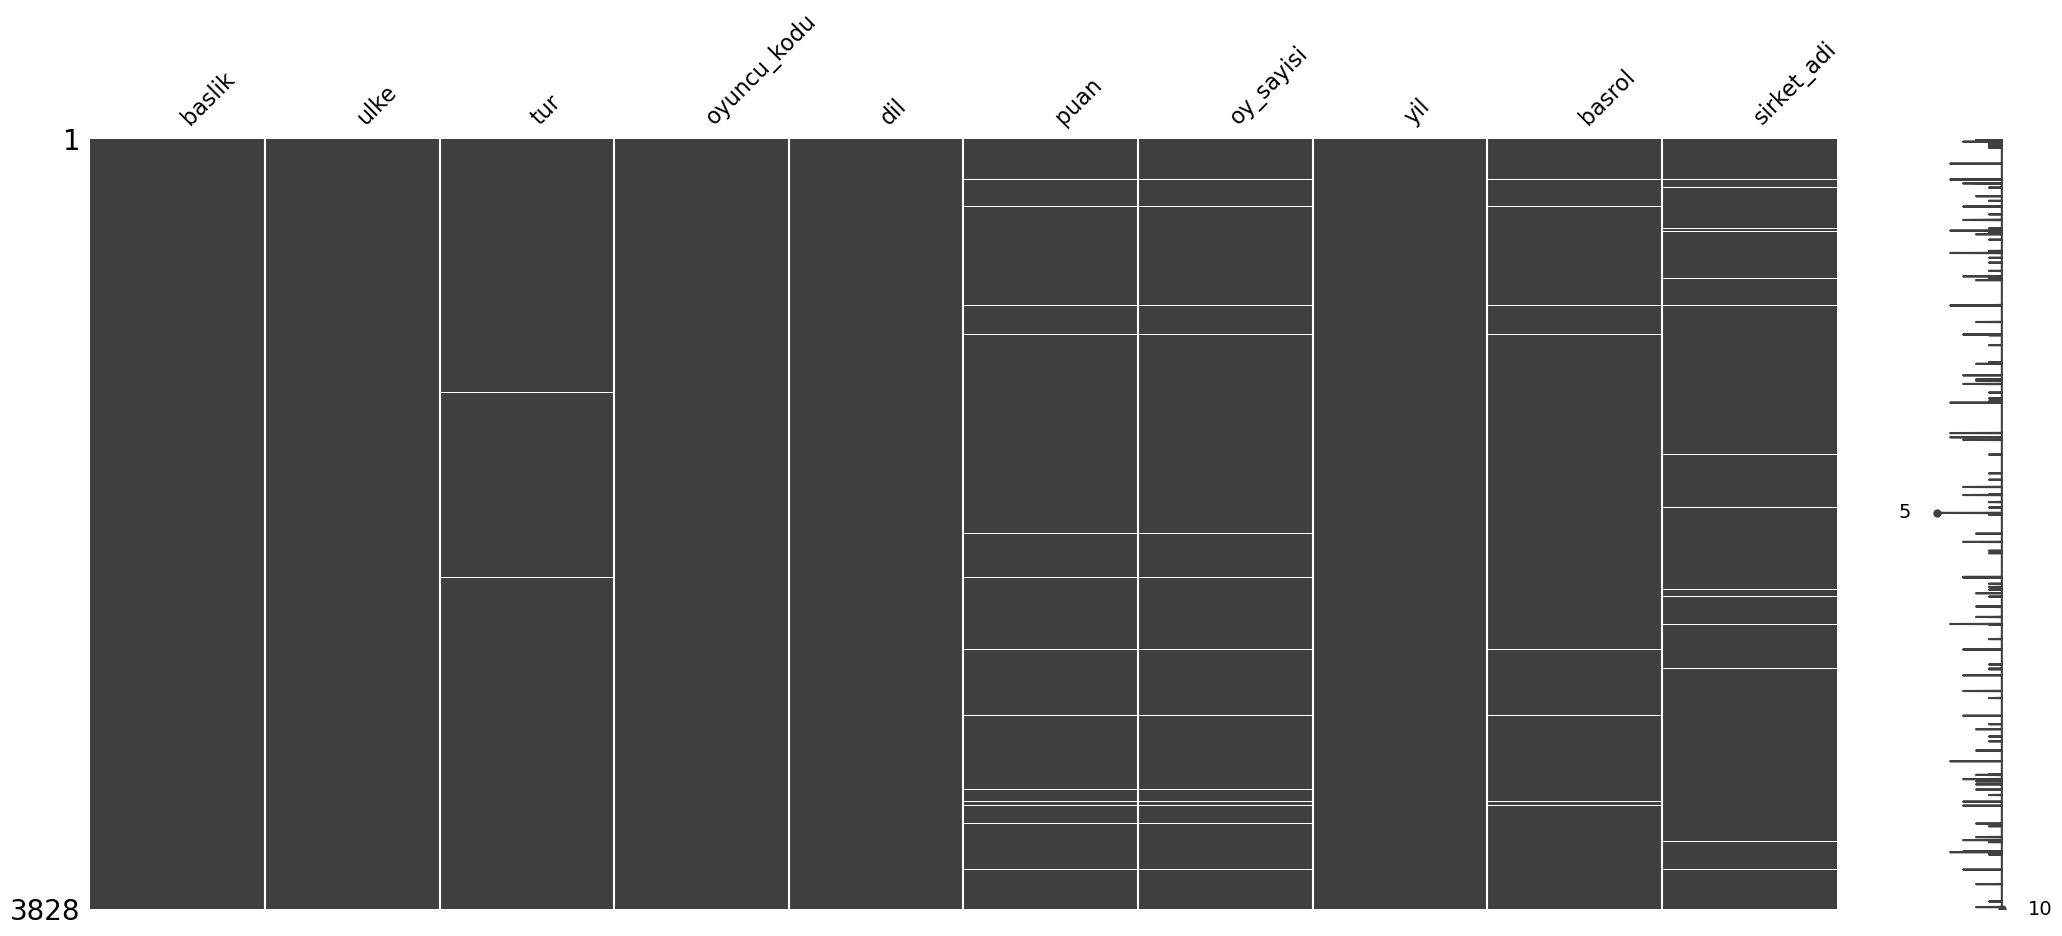

In [6]:


msgn.matrix(film)

<AxesSubplot:>

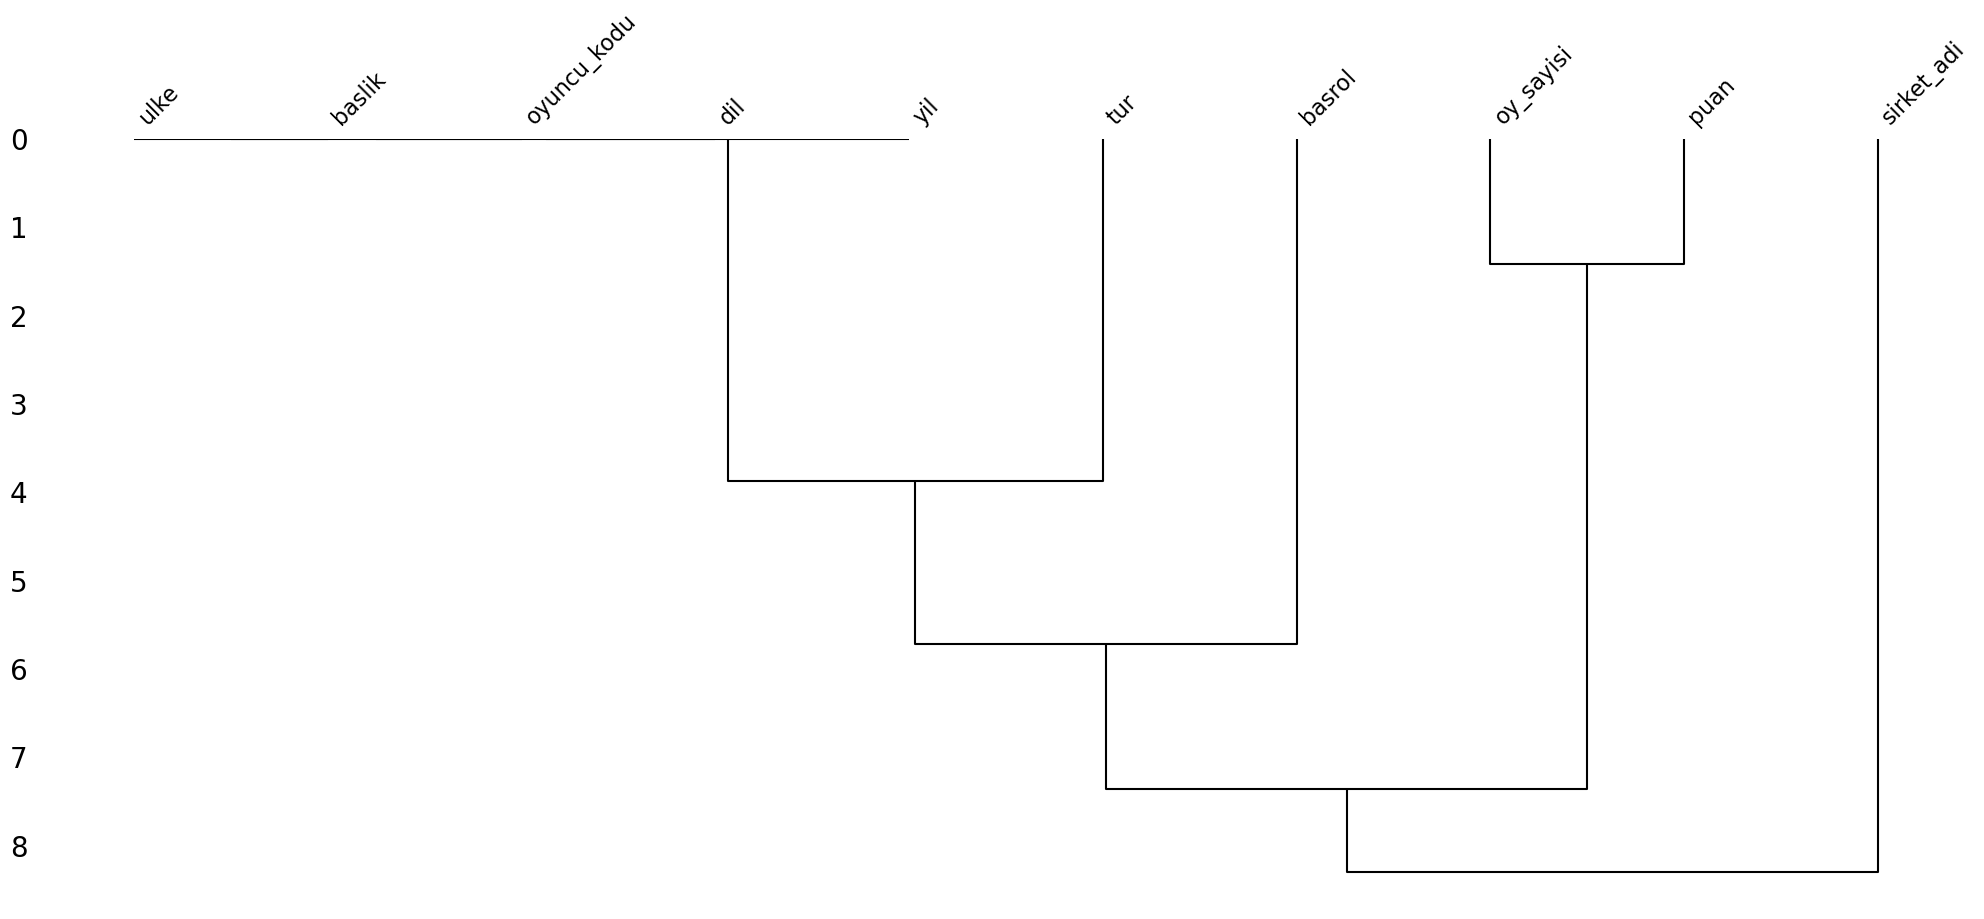

In [7]:
#Ülke, başlık, oyuncu_kodu, dil, yıl için hiç boş veri yok.
msgn.dendrogram(film)

In [8]:
film[film["sirket_adi"].isnull()]

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1684910,A Century of Cinema (1994),USA,Documentary,"[37671.0, 69718.0, 75288.0, 133267.0, 216527.0...","[English, English, English, English, English, ...",5.1,239.0,1994,0.0,None
1686071,A Cry in the Dark (2010),Canada,Drama,"[128319.0, 132943.0, 209233.0, 363646.0, 42053...","[English, English, English, English, English, ...",7.4,5.0,2010,3.0,None
1708591,After Life (1999),USA,Drama,"[nan, nan]","[English, English]",NaN,NaN,1999,NaN,None
1725437,An Uninvited Guest (2010),South Korea,Horror,"[nan, nan]","[Korean, Korean]",NaN,NaN,2010,NaN,None
1735791,Arguing the World (1998),USA,Documentary,"[121023.0, 576899.0, 712107.0, 860877.0, 13615...","[English, English, English, English, English]",6.9,65.0,1998,0.0,None
...,...,...,...,...,...,...,...,...,...,...
2492771,The Wild McCullochs (1975),USA,Drama,"[80560.0, 236016.0, 313319.0, 345012.0, 389000...","[English, English, English, English, English, ...",4.8,59.0,1975,3.0,None
2503124,Time Code (2005),Italy,Drama,"[nan, nan]","[Italian, Italian]",NaN,NaN,2005,NaN,None
2504995,To Be or Not to Be (1942),USA,Comedy,"[70042.0, 128275.0, 189335.0, 430969.0, 637819...","[English, English, English, English, English, ...",8.1,13350.0,1942,5.0,None


In [9]:
def eksik_verilerim(df):
    eksik_veriler = df.isnull().sum()
    eksik_veriler_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_veriler_tablo = pd.concat([eksik_veriler, eksik_veriler_yuzde], axis=1)
    eksik_veriler_tablo_sonuc = eksik_veriler_tablo.rename(
    columns = {0 : 'Eksik Verilerin Sayısı', 1 : '% Değeri'})
    return eksik_veriler_tablo_sonuc

eksik_verilerim(film)   

,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.000000
ulke,0,0.000000
tur,15,0.391850
oyuncu_kodu,0,0.000000
dil,0,0.000000
puan,55,1.436782
oy_sayisi,57,1.489028
yil,0,0.000000
basrol,31,0.809822
sirket_adi,64,1.671891


In [10]:

film = film.fillna("0")


eksik_verilerim(film)


,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.0
ulke,0,0.0
tur,0,0.0
oyuncu_kodu,0,0.0
dil,0,0.0
puan,0,0.0
oy_sayisi,0,0.0
yil,0,0.0
basrol,0,0.0
sirket_adi,0,0.0


In [11]:
oyuncular = oyuncular.dropna()
eksik_verilerim(oyuncular)

,Eksik Verilerin Sayısı,% Değeri
oyuncu_kodu,0,0.0
isim,0,0.0
cinsiyet,0,0.0


In [12]:
film.shape

(3828, 10)

In [13]:
oyuncular.shape

(3798, 3)

In [14]:
#Sütunların dağılımı
film.describe().T


,count,mean,std,min,25%,50%,75%,max
yil,3828.0,1985.36442,18.176059,1898.0,1981.0,1994.0,1997.0,2014.0


In [15]:
oyuncular.describe().T

,count,mean,std,min,25%,50%,75%,max
oyuncu_kodu,3798.0,127591.18931,207430.01525,4.0,30503.0,70215.5,148618.0,2579564.0


**4-) Ülkelere göre çekilen film sayısı**

In [16]:
film.groupby('ulke').size().sort_values(ascending=False)


ulke
USA                               2500
UK                                 368
France                             275
Canada                             125
Germany                            104
Australia                           67
Italy                               59
Japan                               53
Ireland                             30
Belgium                             29
Hong Kong                           22
China                               18
Spain                               17
Argentina                           13
Austria                             12
New Zealand                         12
Mexico                              12
Denmark                             11
India                               10
Brazil                               7
South Africa                         5
Norway                               5
Soviet Union                         5
Czech Republic                       5
Cuba                                 5
Netherlands         

**Yıllara göre film sayısı ve görselleştirilmesi**

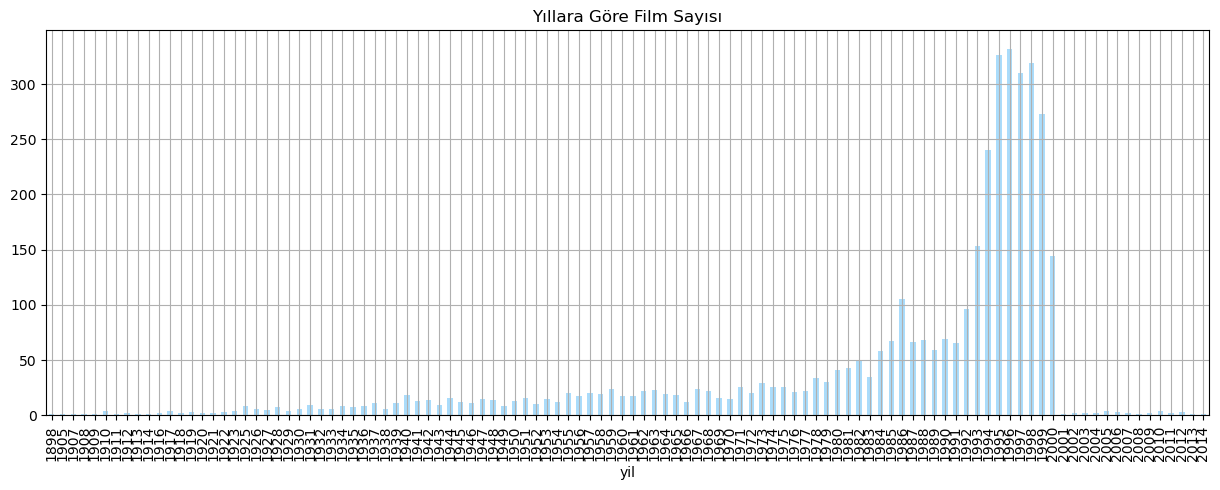

In [17]:
film.groupby('yil').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Yıllara Göre Film Sayısı', alpha=0.7,
grid=True);


******************************************************

**Ülkelere göre film sayısı**

******************************************************

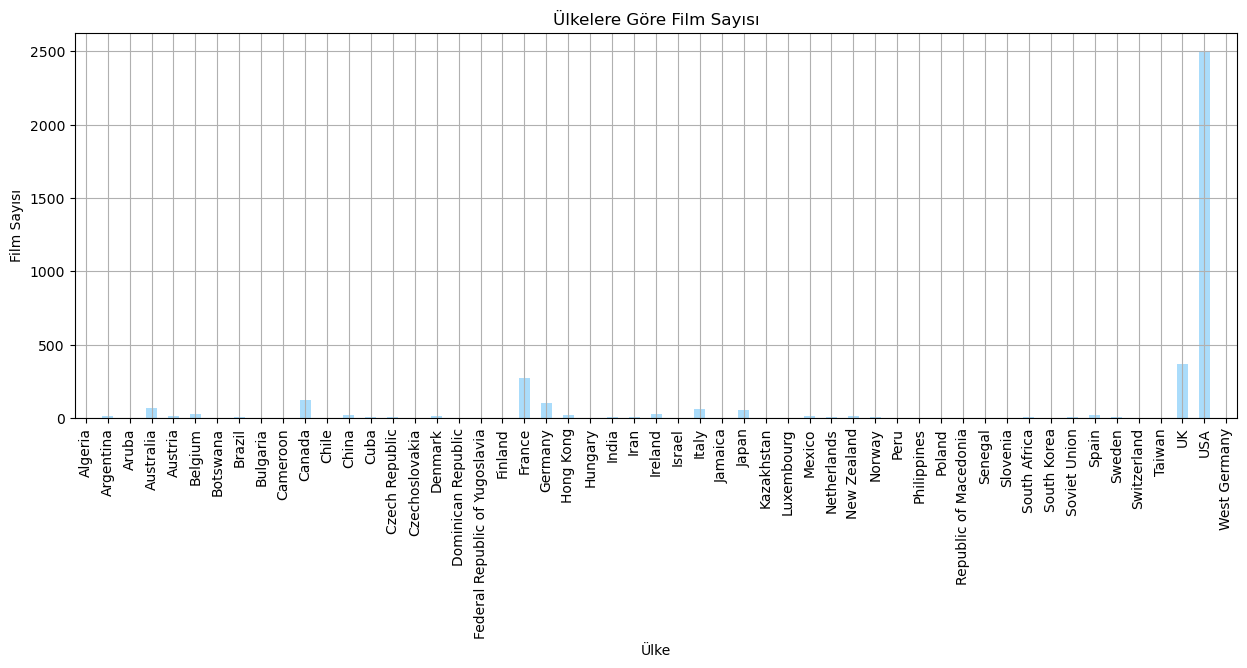

In [18]:
film.groupby('ulke').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Ülkelere Göre Film Sayısı', alpha=0.7, xlabel='Ülke',
 ylabel='Film Sayısı', grid=True);


Yukarıda tüm ülkeler var ve dolayısıyla karışık. İlk 10 ülkeye bakalım.

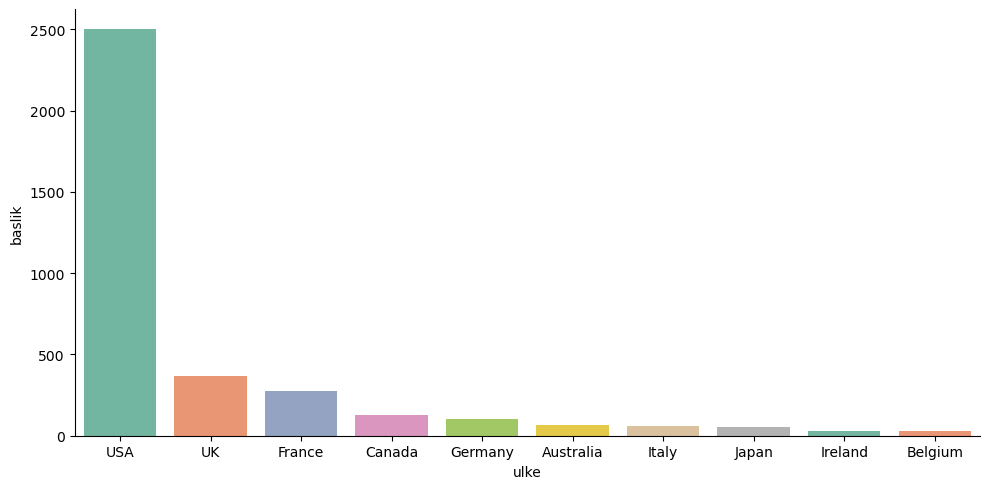

In [19]:
#Ülkelere göre film sayısını catplot ile gösterme

#en fazla oynanan ilk 10 ülkeyi seçme
ulke_tur = film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
catplot = sns.catplot(x='ulke', y='baslik', data=ulke_tur.reset_index(), kind='bar', height=5, aspect=2, palette='Set2')

* Kolayca gruplara ayırabilmek için fonksiyon tanımlayalım

In [20]:
def gruplama(df, kolon):
    return df.groupby(kolon).size().sort_values(ascending=False)

gruplama(film, 'ulke')

ulke
USA                               2500
UK                                 368
France                             275
Canada                             125
Germany                            104
Australia                           67
Italy                               59
Japan                               53
Ireland                             30
Belgium                             29
Hong Kong                           22
China                               18
Spain                               17
Argentina                           13
Austria                             12
New Zealand                         12
Mexico                              12
Denmark                             11
India                               10
Brazil                               7
South Africa                         5
Norway                               5
Soviet Union                         5
Czech Republic                       5
Cuba                                 5
Netherlands         

* Scatter çizmek için fonksiyon tanımlayalım.

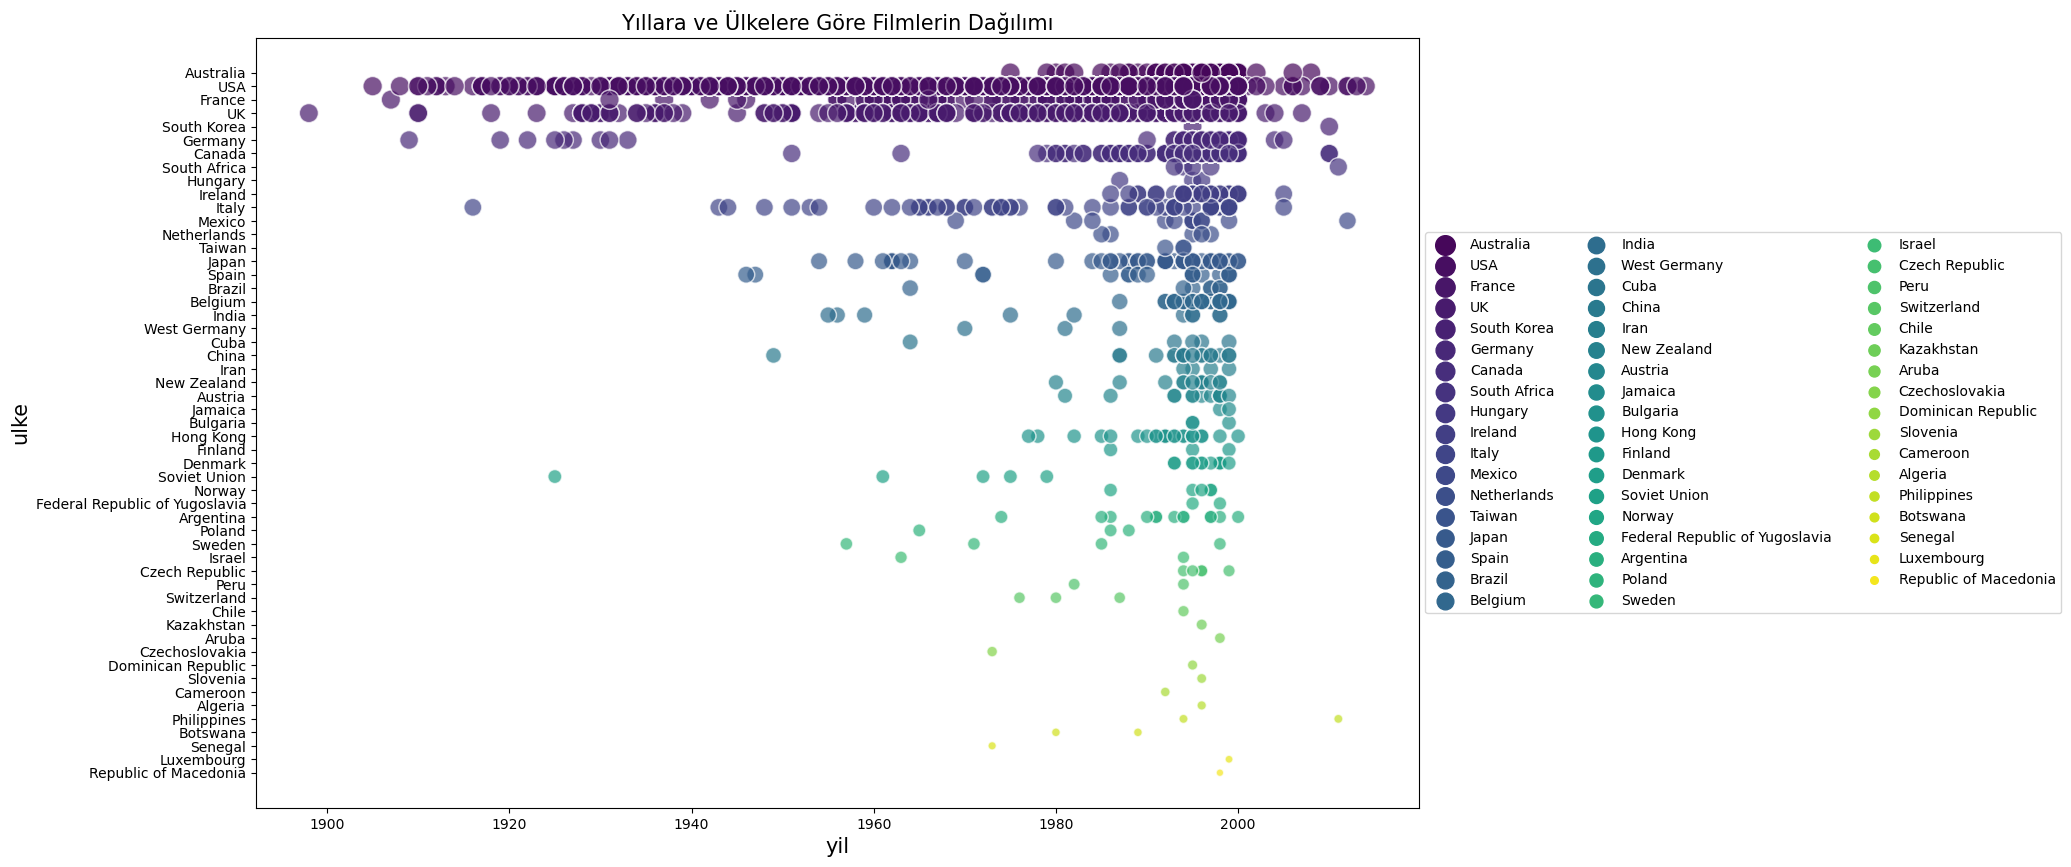

In [21]:
#yıllara ve ülkeye göre scatter plot



def scatter_ciz(x, y, data, hue, size, sizes, alpha, palette, title):
    plt.figure(figsize=(15,10))
    g = sns.scatterplot(x=x, y=y, data=data, hue=hue, size=size, sizes=sizes, alpha=alpha, palette=palette)
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
    g.set_xlabel(x, fontsize=15)
    g.set_ylabel(y, fontsize=15)
    plt.title(title, fontsize=15)
    plt.show()

scatter_ciz('yil', 'ulke', film, 'ulke', 'ulke', (30, 200), 0.7, 'viridis', 'Yıllara ve Ülkelere Göre Filmlerin Dağılımı')




In [22]:
%matplotlib inline

*  Pie-chart için bir fonksiyon tanımlayalım.

In [23]:

def ilk_10_ciz(x, y, title):
    
    colors = ['lightskyblue', 'lightcoral', 'yellowgreen', 'gold', 'lightblue', 'pink', 'lightgreen', 'orange', 'lightyellow', 'lightpink']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, shadow = True, startangle=90, radius=1.2, rotatelabels = True, textprops=dict(color="green"), 
    wedgeprops = { 'linewidth' :0.9, 'edgecolor' : 'white' }, labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)])
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

    plt.axis('equal')
    plt.text(0, 0, title, fontsize=20, color='black', horizontalalignment='center', verticalalignment='center')




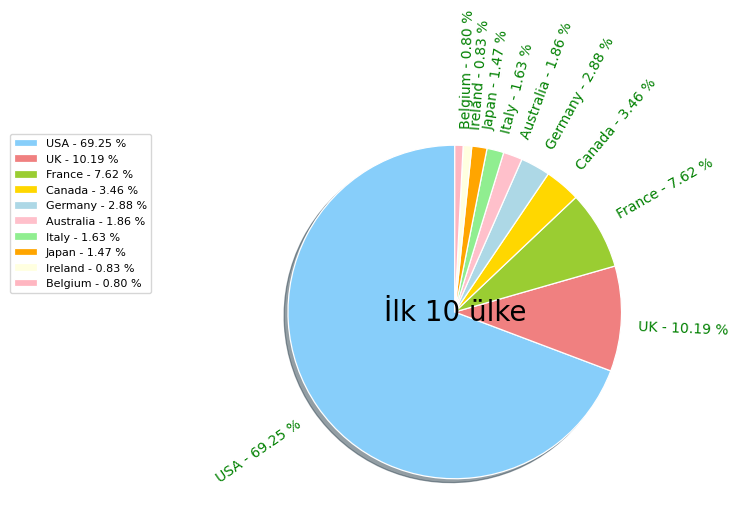

In [24]:
film_ulke = film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
x = film_ulke.sort_values(ascending=False).head(10).index
y = film_ulke.sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'İlk 10 ülke')
plt.savefig('Proje Çıktıları/filmlerin_ulkelere_gore_dagilimi.png', bbox_inches='tight', dpi=600, transparent=True)

******************************************************

**5-) Aktörlerin oynadığı film sayısı**

******************************************************

In [25]:


def sayisini_bul(df, kolon):
    return df.groupby(kolon).size().sort_values(ascending=False).head(20)

oyuncu_film_sayisi = sayisini_bul(oyuncular, 'isim')
oyuncu_film_sayisi


isim
Affleck, Ben                13
Aiello, Danny               12
Ackland, Joss               11
Abraham, F. Murray          11
Bacon, Kevin (I)            10
Abercrombie, Ian             9
Astaire, Fred                9
Alexander, Jason (I)         9
Aykroyd, Dan                 9
Angel, Jack (I)              9
Ashton-Griffiths, Roger      9
Allen, Woody                 8
Bacarella, Mike              8
Adair-Rios, Mark             7
Ameche, Don                  7
Auteuil, Daniel              7
Abrahams, Jon (I)            7
Acheson, Mark                7
Adamson, Christopher (I)     7
Akin, Philip                 6
dtype: int64

* En çok filmde oynayan ilk 10 oyuncuyu çizmek için:

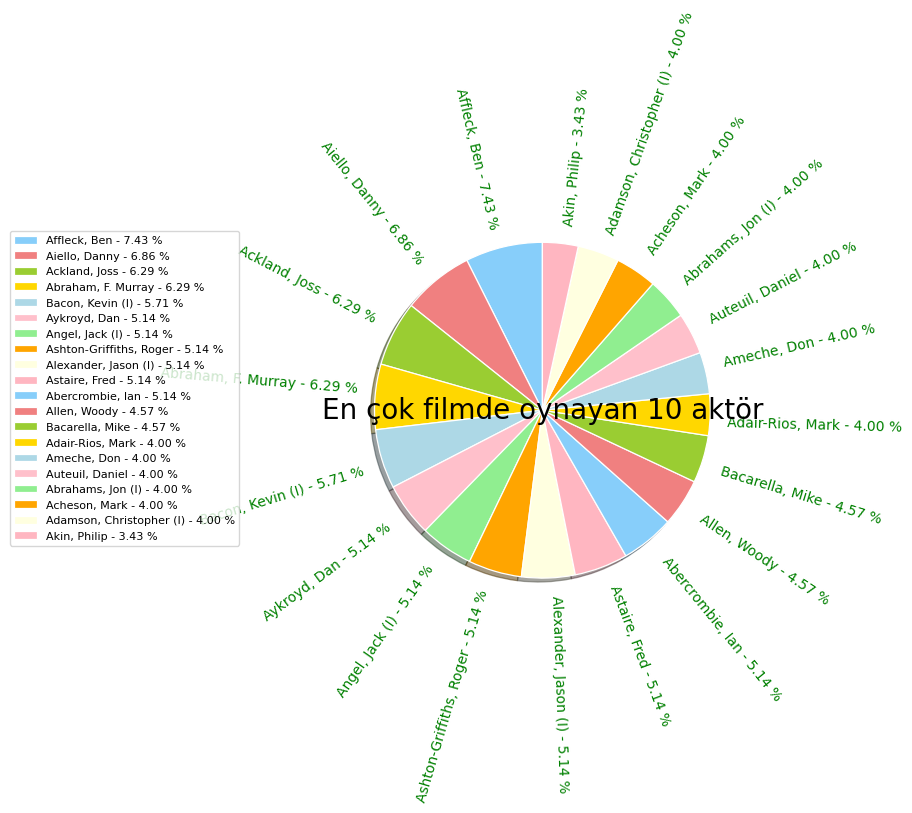

In [26]:
x = oyuncu_film_sayisi.sort_values(ascending=False).head(20).index
y = oyuncu_film_sayisi.sort_values(ascending=False).head(20).values
ilk_10_ciz(x, y, 'En çok filmde oynayan 10 aktör')
plt.savefig('Proje Çıktıları/en_cok_filmde_oynayan_aktorler.png', bbox_inches='tight', dpi=600, transparent=True)

******************************************************

**6-) Aktörlerin oynadığı film türleri**

******************************************************

In [27]:

puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())

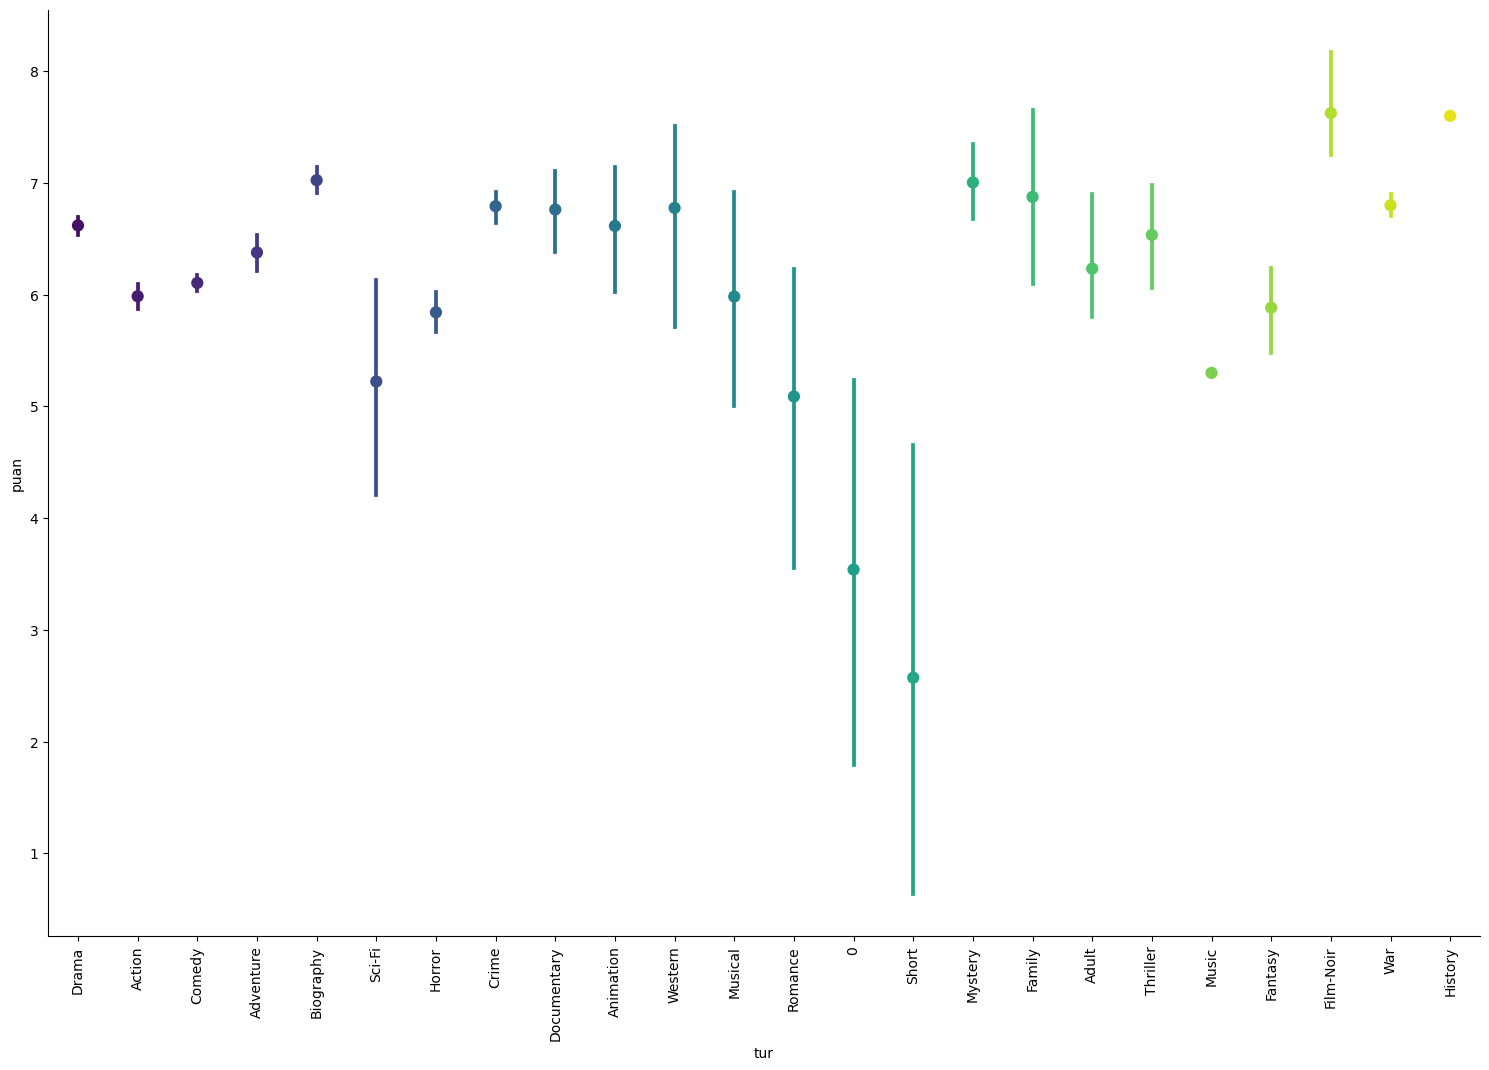

In [28]:

sns.catplot(x = 'tur', y = 'puan', data = puanlama, kind = 'point', height = 10, aspect = 1.5, palette = 'viridis')
plt.xticks(rotation = 90);

In [29]:
#Tür, isim, oyuncu kodu ve film kodu sütunlarından oluşan bir veri seti oluşturuldu.


oyuncular_kod = oyuncular[['isim', 'oyuncu_kodu']] 
turler = film[['tur']]
oyuncu_tur = pd.concat([oyuncular_kod, turler], axis=1)

oyuncu_tur.dropna(inplace=True)
oyuncu_tur

turlere_gore_oyuncular = oyuncu_tur.groupby("tur")["isim"].value_counts()

with open('Proje Çıktıları/turlere_gore_oyuncular.txt', 'w', encoding="utf-8") as f:
    f.write(turlere_gore_oyuncular.to_string())



#film_oyuncu_baglantisi = film_oyuncular.append(oyuncular, ignore_index=True,)
#film_oyuncu_baglantisi

In [30]:
oyuncuların_film_turune_gore_siralanması = oyuncu_tur.groupby("isim")["tur"].value_counts().sort_values(ascending=False).reset_index(name="count")


with open('Proje Çıktıları/oyuncuların_film_turune_gore_siralanması.txt', 'w', encoding='utf-8') as f:
    f.write(oyuncuların_film_turune_gore_siralanması.to_string())

In [31]:
#En çok hangi tür filmlerde oynayan oyuncular var?

oyuncuların_film_turune_gore_siralanması.groupby("isim").head(1).sort_values(by="count", ascending=False).head(10)

,isim,tur,count
0,"Affleck, Ben",Comedy,8
2,"Astaire, Fred",Comedy,6
1,"Aiello, Danny",Comedy,6
3,"Ameche, Don",Comedy,5
4,"Alexander, Jason (I)",Comedy,5
5,"Abercrombie, Ian",Comedy,5
6,"Adamson, Christopher (I)",Action,5
7,"Angel, Jack (I)",Adventure,5
8,"Allen, Woody",Comedy,5
16,"Abraham, F. Murray",Action,4


In [32]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au]
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us]
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us]
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us]
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",0,0,2014,2.0,Grindhouse Films [us]


**7-) Ülkelere göre hangi tür filmler çekilmiş?** 

In [33]:
#oyuncu ve film tablolarının birleştirilmesi. Mantıklı olmuyor çünkü filmlerin cinsiyet verisi yok. O yüzden bu tabloyu kullanmayacağız. 
oyuncu_film = pd.concat([film, oyuncular], axis=1)
oyuncu_film.head()




,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,oyuncu_kodu,isim,cinsiyet
movieid,,,,,,,,,,,,,
1672052.0,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980.0,20.0,7 Network [au],88796.0,"Ball, Ray (I)",M
1672111.0,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988.0,39.0,Paramount Pictures [us],25488.0,"Alexander, Jace",M
1672580.0,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997.0,22.0,Lakeshore Entertainment [us],25753.0,"Alexander, Matt (I)",M
1672716.0,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986.0,3.0,Aaron Spelling Productions [us],132909.0,"Berke, Ed",M
1672946.0,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",0,0,2014.0,2.0,Grindhouse Films [us],238614.0,"Cantu, David (III)",M


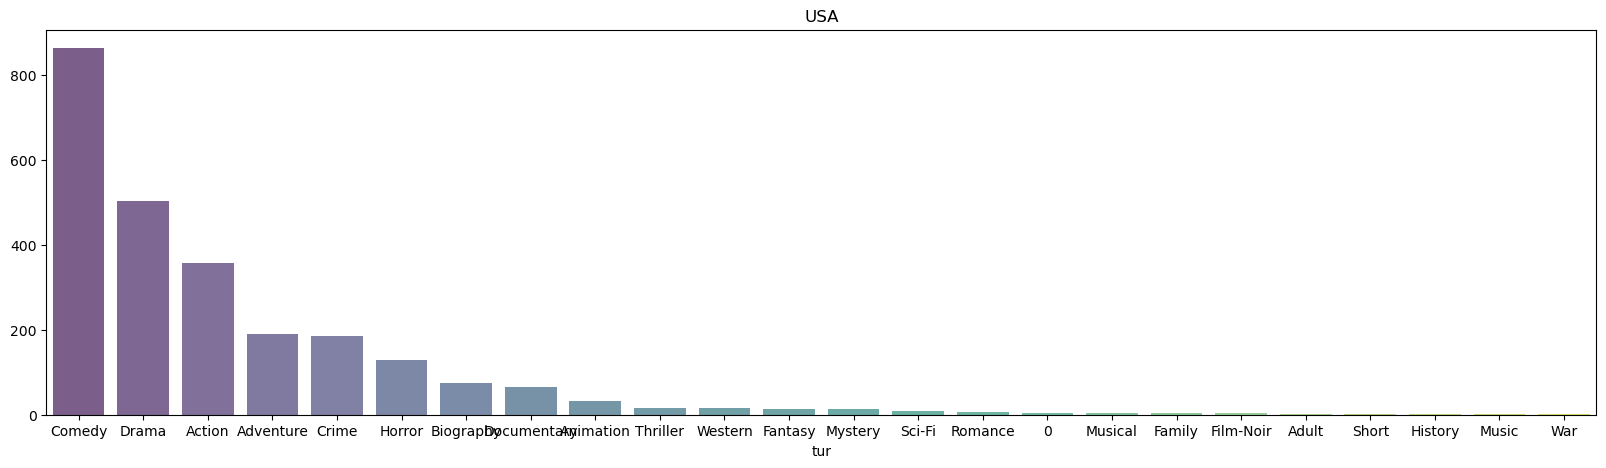

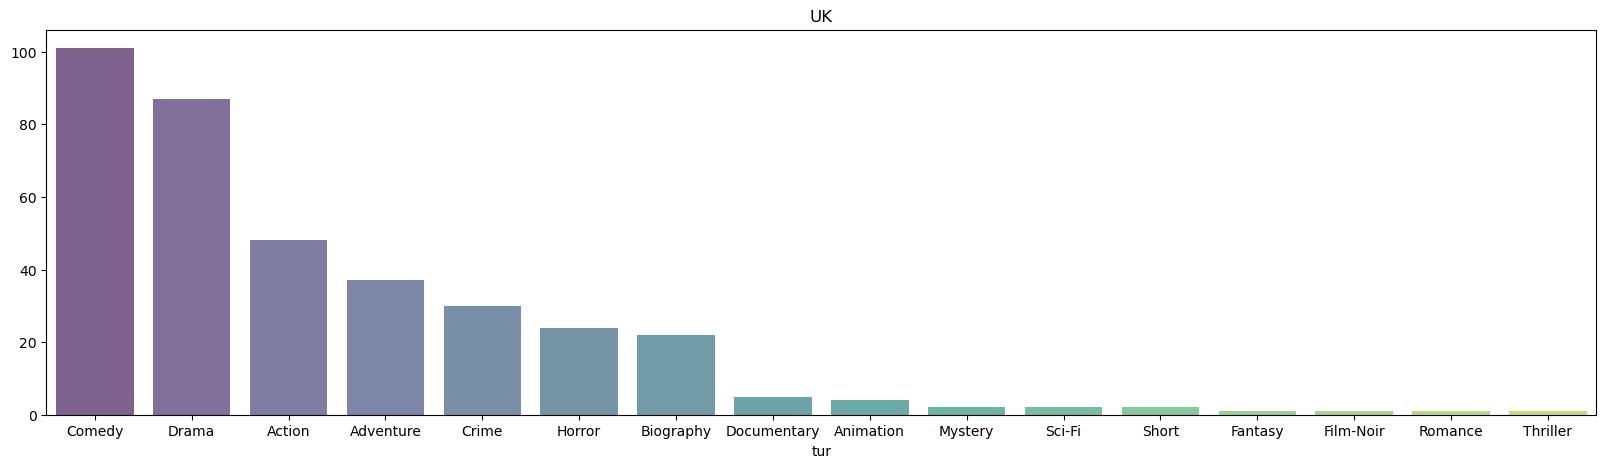

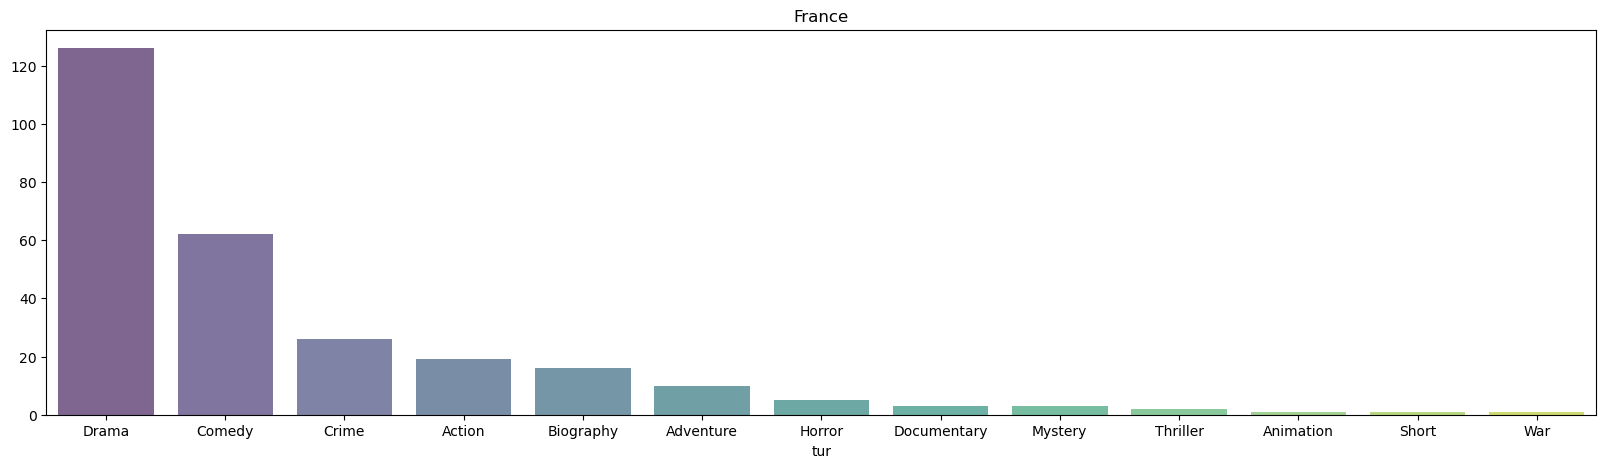

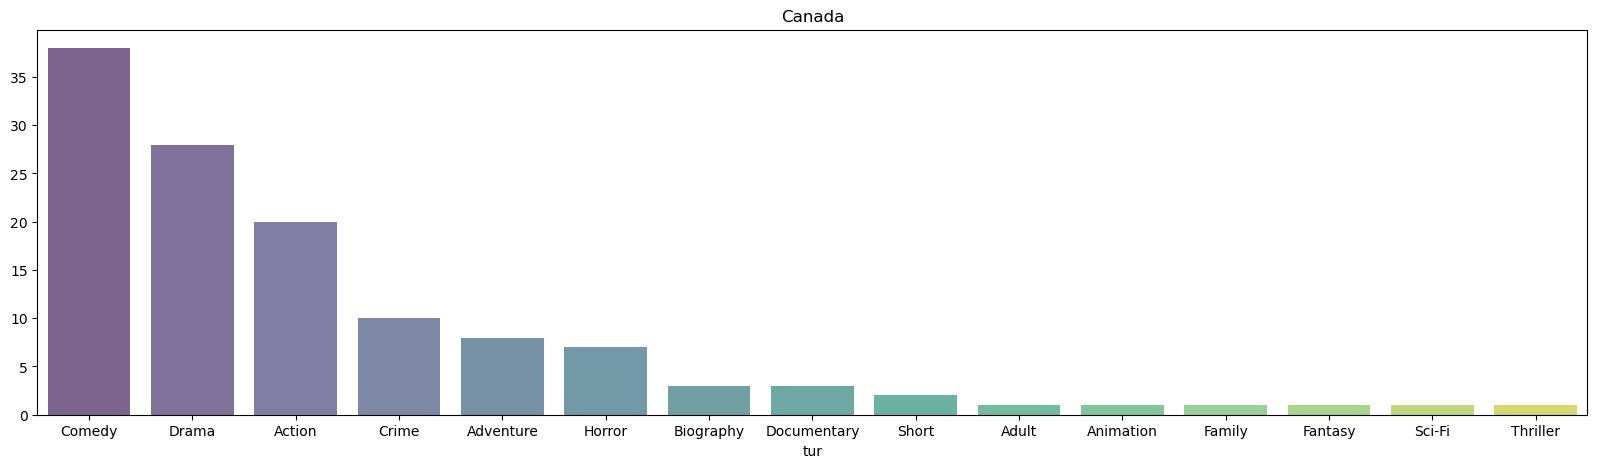

In [34]:

ulke_tur = pd.concat([film['tur'],film['ulke']], axis=1)

ulke_tur.head(10)
ulke_tur = ulke_tur.groupby("ulke")["tur"].value_counts()
ulke_tur



#en çok filmi olan 10 ülke
film.groupby('ulke').count()['baslik'].sort_values(ascending=False).head(10)
#USA, UK, Fransa, Kanada ve Türkiye için inceleyelim.
usa = ulke_tur.loc['USA']
uk = ulke_tur.loc['UK']
fr = ulke_tur.loc['France']
can = ulke_tur.loc['Canada']


#Grafik çizimi için fonksiyon tanımlayalım.
def ciz(country, title):
    plt.figure(figsize=(20,5))
    sns.barplot(x=country.index, y=country.values, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.show()

ciz(usa, 'USA')
ciz(uk, 'UK')
ciz(fr, 'France')
ciz(can, 'Canada')

    



******************************************************

**8-) Türe göre kadın-erkek aktör sayısı**

******************************************************

*Büyük set birleşiminde kadın-erkek aktör sayısı*

Dosyanın orijinal haliyle kadın-erkek sayısına erişmek için movies_1(*df1*) kullanmamız yeterli olacaktır.


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98690 entries, 0 to 98689
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   actorid  98690 non-null  int64 
 1   name     98690 non-null  object
 2   sex      98690 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [36]:
df1.groupby('sex').count()['name'].sort_values(ascending=False)

sex
M    65794
F    32896
Name: name, dtype: int64

65.794 erkek ve 32.896 kadın oyuncuya dair verimiz var ancak veri setlerini birleştirip eksik veriler nedeniyle bilgi kaybettiğimiz zaman bu oranın çok değişeceğini dolayısıyla yanlış yönlendirebileceğini göreceğiz. 

*Küçük sette türe göre kadın-erkek aktör sayısı*

In [37]:
cinsiyet = sayisini_bul(oyuncular, 'cinsiyet')
cinsiyet

cinsiyet
M    3782
F      16
dtype: int64

Bunun kaynağı veri setini başta temizleyip ona göre inceleme yapmamız. Sadece cinsiyet, tür ve film kodlarıyla oyuncu kodlarını birleştiren veri setlerini kullanarak yapılan bir analiz daha anlamlı bir veri sağlayacaktır. 1. 3. ve 6. veri setlerini kullanacağız. Kafa karıştırmaması için baştan okutalım ve yeniden isimlendirelim.

b'Skipping line 16932: expected 4 fields, saw 5\nSkipping line 16933: expected 4 fields, saw 5\nSkipping line 16943: expected 4 fields, saw 5\nSkipping line 16948: expected 4 fields, saw 5\nSkipping line 36078: expected 4 fields, saw 5\nSkipping line 36086: expected 4 fields, saw 6\nSkipping line 39517: expected 4 fields, saw 5\n'


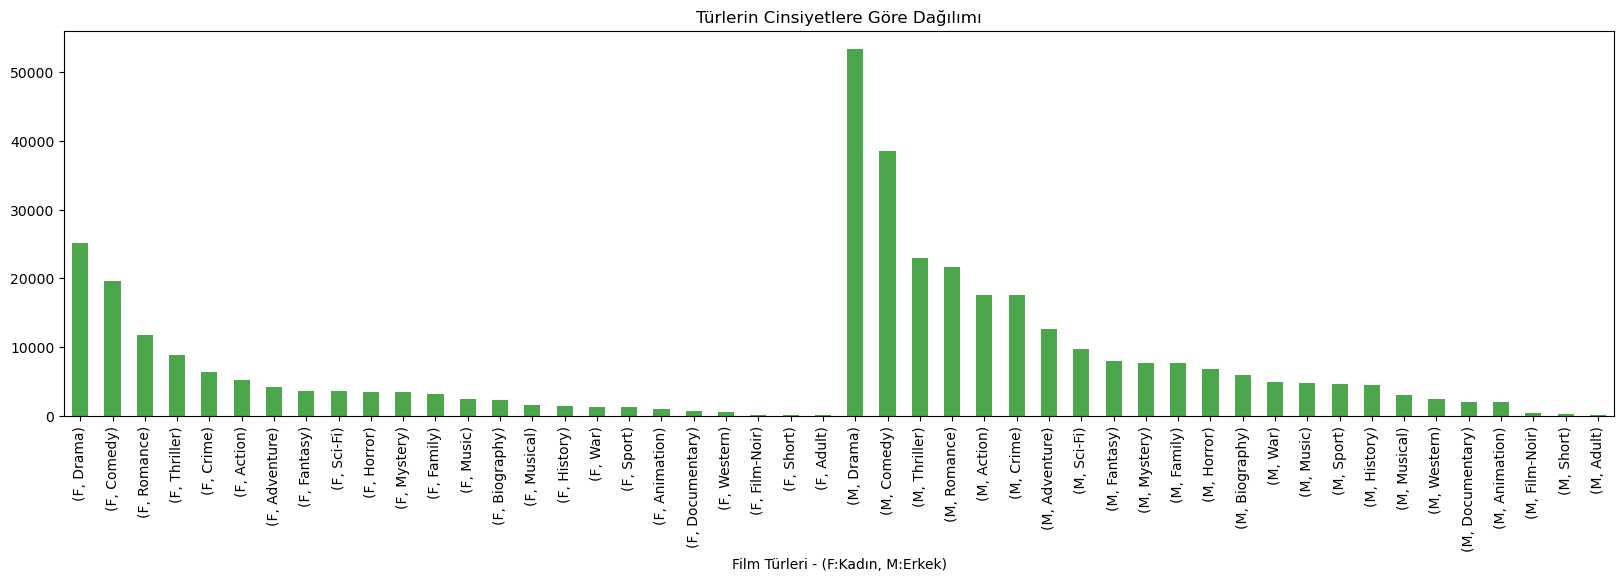

(<AxesSubplot:title={'center':'Türlerin Cinsiyetlere Göre Dağılımı'}, xlabel='Film Türleri - (F:Kadın, M:Erkek)'>,
 Text(0.5, 24.000000000000014, 'Film Türleri - (F:Kadın, M:Erkek)'),
 Text(0.5, 1.0, 'Türlerin Cinsiyetlere Göre Dağılımı'),
 None)

In [38]:
aktor_ve_film = pd.read_csv("movies_dataset/movies_6.csv", on_bad_lines='warn')
tur_ve_aktor = pd.read_csv("movies_dataset/movies_3.csv", on_bad_lines='warn')
cinsiyet_ve_aktor = pd.read_csv("movies_dataset/movies_1.csv", on_bad_lines='warn')

aktor_ve_film = aktor_ve_film[['movieid', 'actorid']]
tur_ve_aktor = tur_ve_aktor[['movieid', 'genre']]
cinsiyet_ve_aktor= cinsiyet_ve_aktor[['sex', 'actorid']]

#Cinsiyet, film ve aktörlerin birleştirilmesi
tur_ve_aktor_ve_cinsiyet = pd.merge(aktor_ve_film, cinsiyet_ve_aktor, on='actorid')
tur_ve_aktor_ve_cinsiyet = tur_ve_aktor_ve_cinsiyet.merge(tur_ve_aktor, on='movieid')


#Türe göre aktörlerin sayısını bulalım.





tur_ve_aktor_ve_cinsiyet
grup = tur_ve_aktor_ve_cinsiyet.groupby('sex')['genre'].value_counts()
grup.plot(kind='bar', figsize=(20,5), color='green', alpha=0.7), plt.xlabel('Film Türleri - (F:Kadın, M:Erkek)'), plt.title('Türlerin Cinsiyetlere Göre Dağılımı'), plt.show()




Görüyoruz ki bu orantısızlık kadın oyuncuların olduğu veri setlerinin film kodlarıyla olan listeye dahil edilmemesinden kaynaklanıyor. 


In [39]:
#Türe göre kadın erkek sayısını bulalım.

ture_gore_cinsiyet_sayisi = pd.concat([film['tur'], oyuncular['cinsiyet']], axis=1).groupby("tur")["cinsiyet"].value_counts()


In [40]:
#En çok filme göre bakalım.
tur_cinsiyet = pd.concat([film['tur'], oyuncular['cinsiyet']], axis=1).groupby("tur")["cinsiyet"].value_counts().sort_values(ascending=False).reset_index(name="count")
tur_cinsiyet

,tur,cinsiyet,count
0,Comedy,M,1185
1,Drama,M,911
2,Action,M,539
3,Crime,M,278
4,Adventure,M,275
5,Horror,M,190
6,Biography,M,144
7,Documentary,M,75
8,Animation,M,41
9,Mystery,M,22


In [41]:
ture_gore_cinsiyet_sayisi

tur          cinsiyet
0            M             12
             F              1
Action       M            539
Adult        M              3
Adventure    M            275
Animation    M             41
             F              1
Biography    M            144
             F              3
Comedy       M           1185
             F              2
Crime        M            278
             F              1
Documentary  M             75
             F              4
Drama        M            911
             F              2
Family       M              4
Fantasy      M             19
Film-Noir    M              4
History      M              1
Horror       M            190
             F              1
Music        M              1
Musical      M              6
Mystery      M             22
Romance      M              9
Sci-Fi       M             16
Short        M              8
Thriller     M             20
War          M              2
Western      M             17
Name: cinsiyet, dt

In [42]:
#Bazı türlerde kadınlar hiç oynamamış. Bu yüzden az oynan türleri çıkartalım.
#Çıkarttıktan sonra plotunu çizelim. 


turler = tur_cinsiyet['tur'].unique()



#Cinsiyeti sayısallaştıralım.



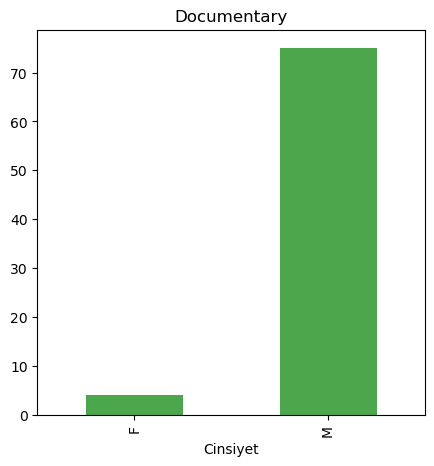

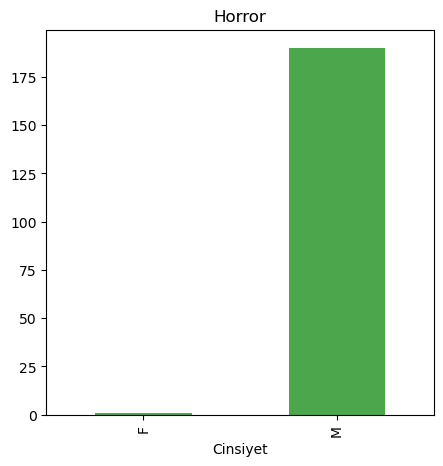

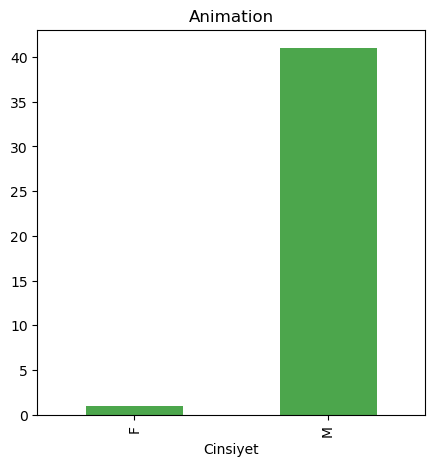

In [43]:

#Türlerin cinsiyet dağılımını görselleştirelim.
def cinsiyet_tur_grafik(tur):
    cinsiyet_tur = tur_cinsiyet[tur_cinsiyet['tur'] == tur]
    cinsiyet_tur = cinsiyet_tur.groupby('cinsiyet')['count'].sum()
    cinsiyet_tur.plot(kind='bar', figsize=(5,5), color='green', alpha=0.7), plt.xlabel('Cinsiyet'), plt.title(tur), plt.show()
cinsiyet_tur_grafik('Documentary')
cinsiyet_tur_grafik('Horror')
cinsiyet_tur_grafik('Animation')

******************************************************

**9-) Ülkelere göre puanlar ve oy sayısı**

******************************************************

In [44]:
film_puan_oy = pd.concat([film['ulke'], film['puan'], film['oy_sayisi']], axis=1)
#floata çevirme
film_puan_oy['oy_sayisi'] = film_puan_oy['oy_sayisi'].astype(float)
film_puan_oy['puan'] = film_puan_oy['puan'].astype(float)


In [45]:
#Puanları kategorik bir hale getirelim.

film_puan_oy['puan_kat'] = pd.cut(film_puan_oy['puan'], bins=[0, 5, 6, 7, 8, 9, 10], labels=['0-5', '5-6', '6-7', '7-8', '8-9', '9-10'])
film_puan_oy['oy_sayisi_kat'] = pd.cut(film_puan_oy['oy_sayisi'], bins=[0, 1000, 10000, 100000, 1000000, 10000000], labels=['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000'])


Text(0.5, 1.05, 'Ülkelerin Puan ve Oy Sayısına Göre Dağılımı')

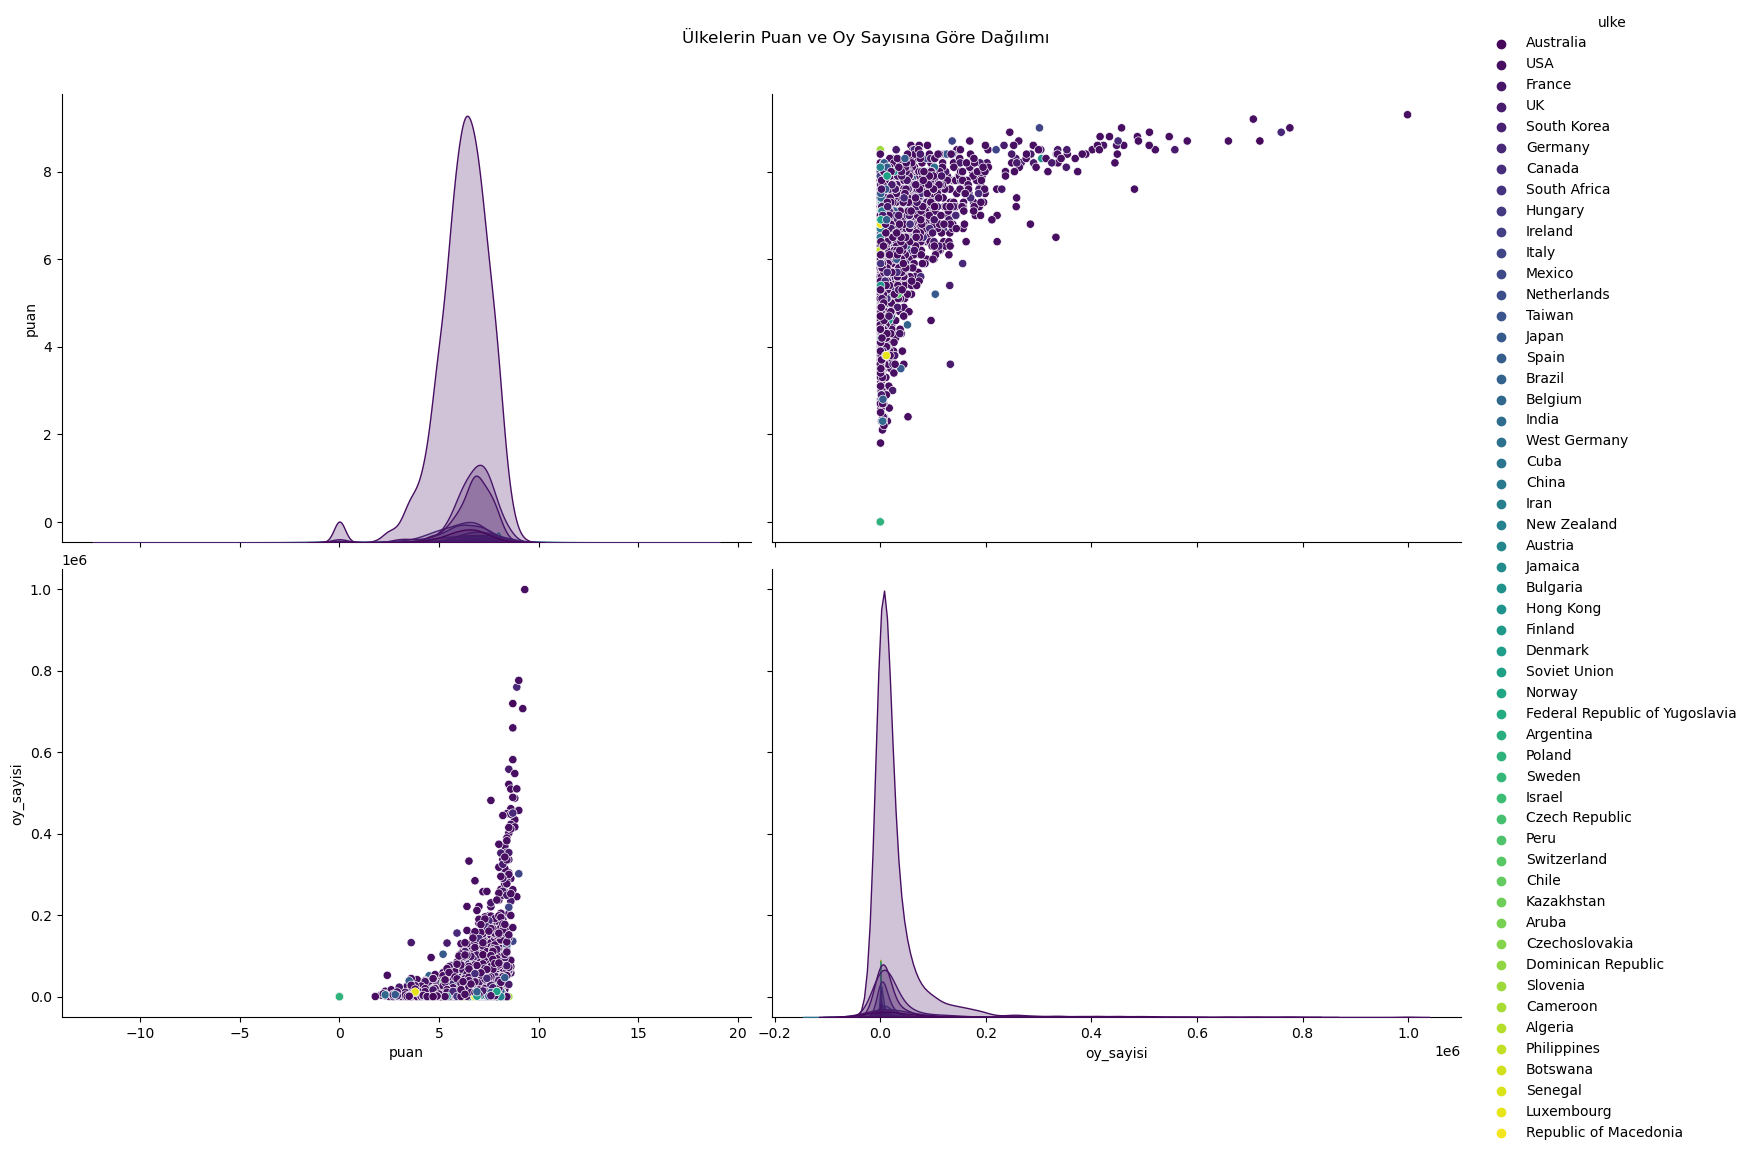

In [46]:
#Puan ve oy sayısına göre ülkelerin dağılımını görselleştirelim.
sns.pairplot(film_puan_oy, hue='ulke', palette='viridis', height=5, aspect=1.5).fig.suptitle('Ülkelerin Puan ve Oy Sayısına Göre Dağılımı', y=1.05)

C:\Users\basak\AppData\Local\Temp\ipykernel_18392\3724382150.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='ulke', y='oy_sayisi', data=film_puan_oy, palette='viridis').set_title('Ülkelerin Oy Sayısına Göre Dağılımı')


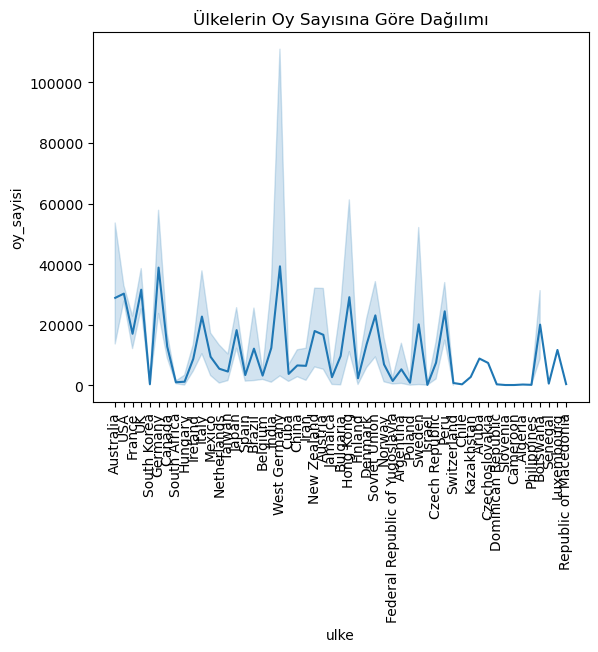

In [47]:
sns.lineplot(x='ulke', y='oy_sayisi', data=film_puan_oy, palette='viridis').set_title('Ülkelerin Oy Sayısına Göre Dağılımı')
plt.xticks(rotation=90);


******************************************************

**10-) Türlere göre puanlar ve oylar**

******************************************************

In [48]:

film_tur_puan = pd.concat([film['tur'], film['puan'], film['oy_sayisi']], axis=1)

In [49]:
film_tur_puan['oy_sayisi'] = film_tur_puan['oy_sayisi'].astype(float)


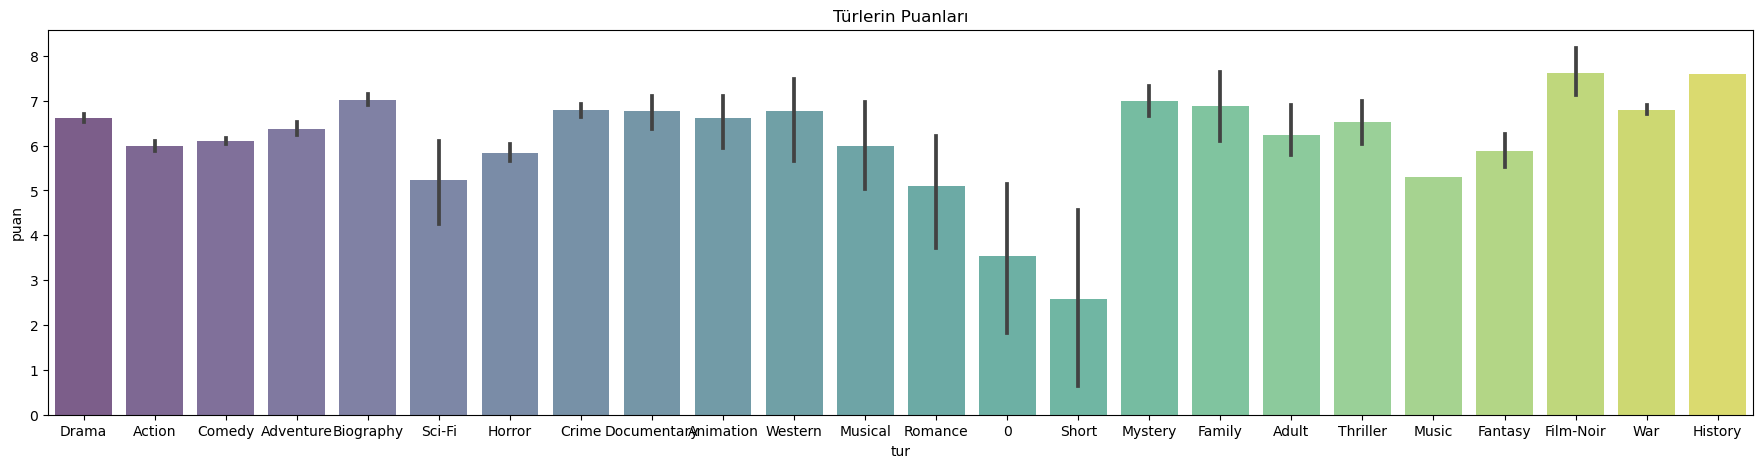

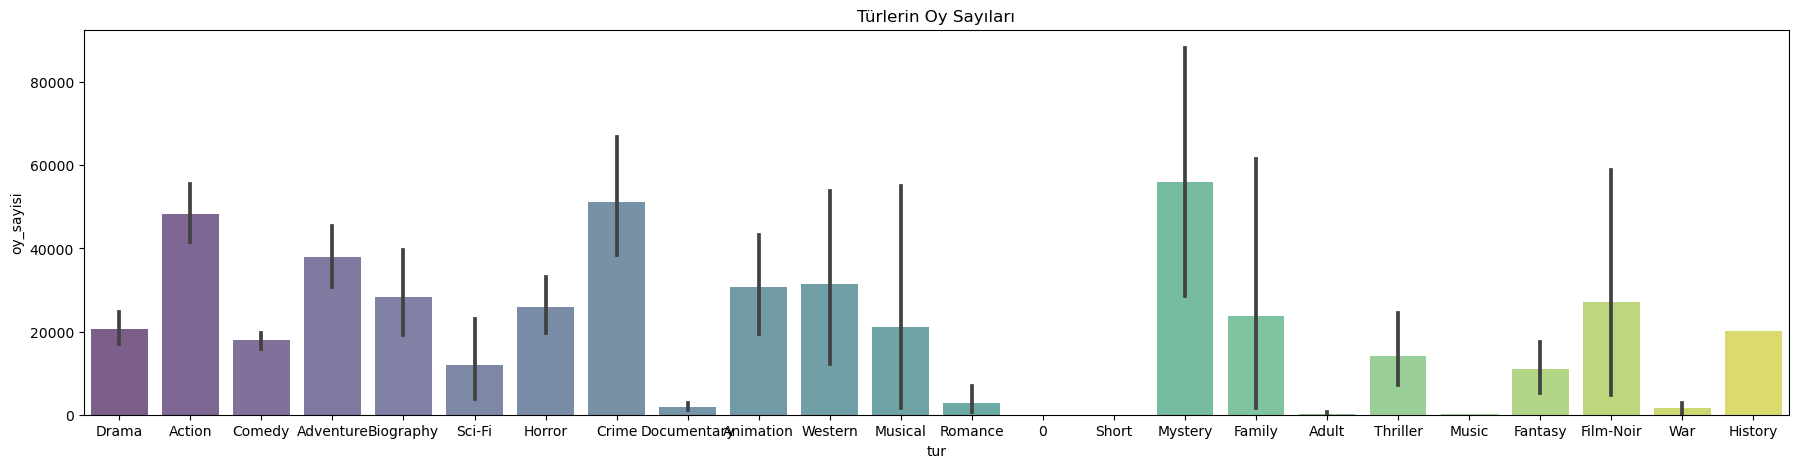

In [50]:
fig, ax = plt.subplots(figsize=(22,5))
film_tur_puan["puan"] = film_tur_puan["puan"].astype(float)
puan_tur = sns.barplot(x = "tur", y = "puan", data = film_tur_puan, palette='viridis', alpha=0.7,).set_title('Türlerin Puanları')

fig, ax = plt.subplots(figsize=(22,5))
oy_sayisi_tur = sns.barplot(x = "tur", y = "oy_sayisi", data = film_tur_puan, palette='viridis', alpha=0.7).set_title('Türlerin Oy Sayıları')
plt.show()


***************************************************

**11-) Puan ve Oylama Miktarlarına Göre Filmlerin İncelenmesi**

*********************************************************

In [51]:
moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')
puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())
moviemat.head()

baslik,'Breaker' Morant (1980),'Crocodile' Dundee II (1988),'Til There Was You (1997),"'night, Mother (1986)",...And Justice for All (2014),1-2-3-4 ou Les collants noirs (1961),1-900 (1996),10 Things I Hate About You (1999),101 Dalmatians (1996),12 Angry Men (1957),...,Zbogum na dvaesetiot vek (1998),Zerkalo (1975),Zero Effect (1998),Zeus and Roxanne (1997),Zone 39 (1996),eXistenZ (1999),¡Three Amigos! (1986),À nous la liberté (1931),Á köldum klaka (1995),Átame! (1990)
movieid,,,,,,,,,,,,,,,,,,,,,
1672052,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672111,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672580,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672716,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672946,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
puanlama.sort_values('puan', ascending = False).head(10)

moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')

puanlama.sort_values('oy_sayisi', ascending = False).head(10)

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
Fight Club (1999),8.9,759494.0,Drama
The Matrix (1999),8.7,719107.0,Action
The Godfather (1972),9.2,706695.0,Crime
Forrest Gump (1994),8.7,659495.0,Drama
Se7en (1995),8.7,581528.0,Crime
Gladiator (2000),8.5,558053.0,Action
Star Wars (1977),8.8,547422.0,Action


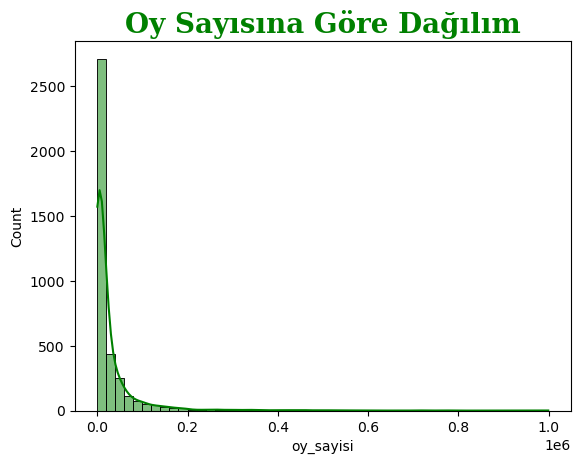

In [53]:
oy_dagilimi = sns.histplot(puanlama['oy_sayisi'],
                           bins=50, kde=True, color = 'green').set_title('Oy Sayısına Göre Dağılım',
                                                        fontsize=20, fontweight='bold',
                                                        color='green',fontfamily='serif')


Text(0.5, 1.0, 'Puanlara Göre Dağılım')

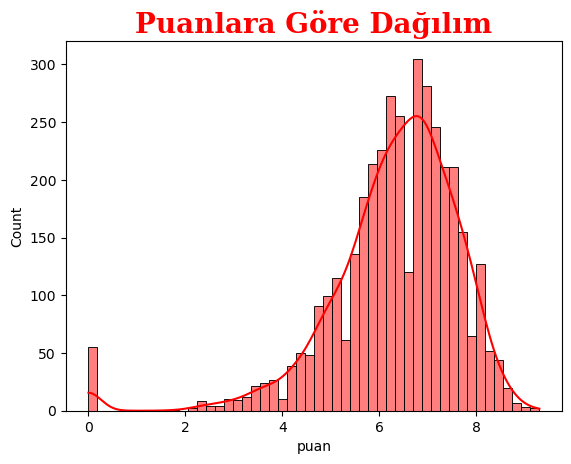

In [54]:
sns.histplot(puanlama['puan'], bins=50, kde=True, color='red').set_title('Puanlara Göre Dağılım', color='red', fontsize=20, fontweight='bold', fontfamily='serif')

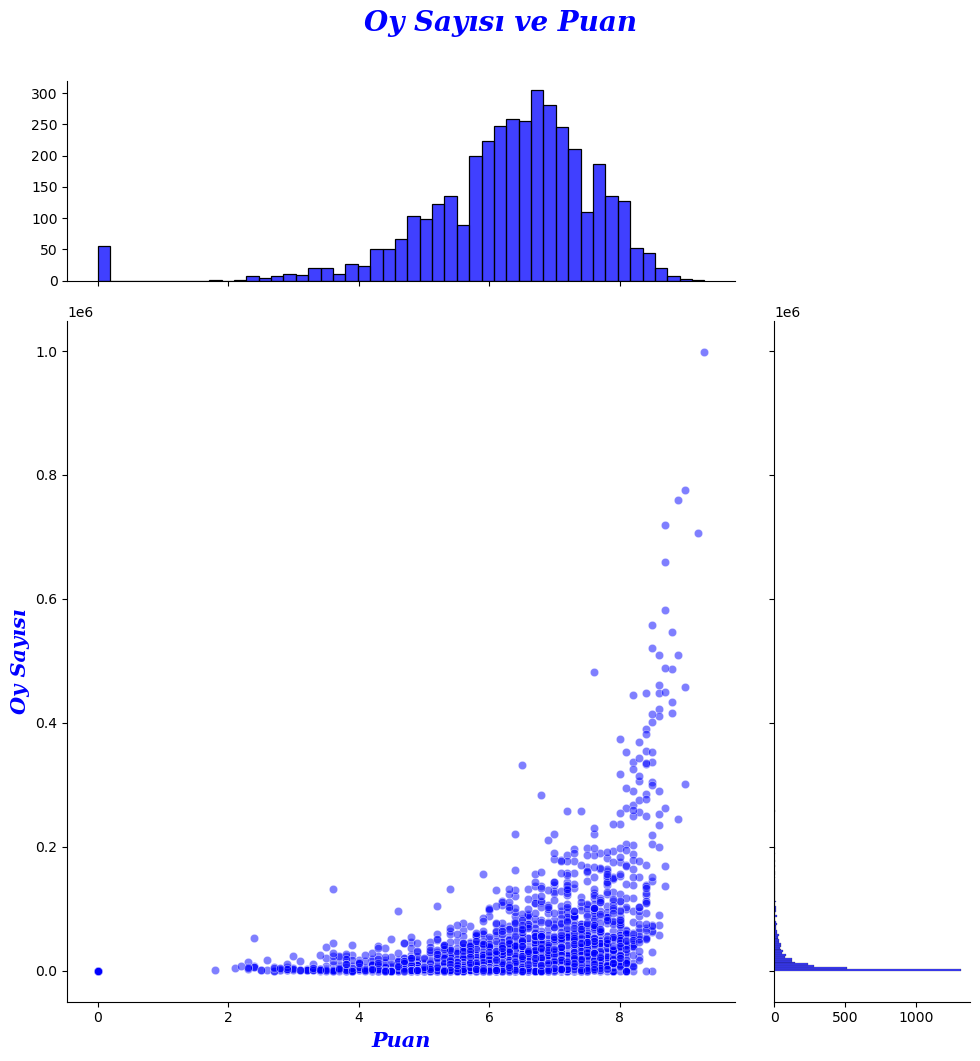

In [55]:
oy_puan =sns.jointplot(x='puan', y='oy_sayisi',
              data = puanlama, alpha=0.5,
              color='blue', height=10, ratio=3,
              space=0.2, marginal_ticks=True,
              joint_kws={'alpha':0.5});
oy_puan.fig.suptitle('Oy Sayısı ve Puan', fontsize=20, y=1.05, x=0.5, color='blue', fontweight='bold', fontfamily='serif', style='italic')
oy_puan.set_axis_labels('Puan', 'Oy Sayısı', fontsize=15, color='blue', fontweight='bold', fontfamily='serif', style='italic')

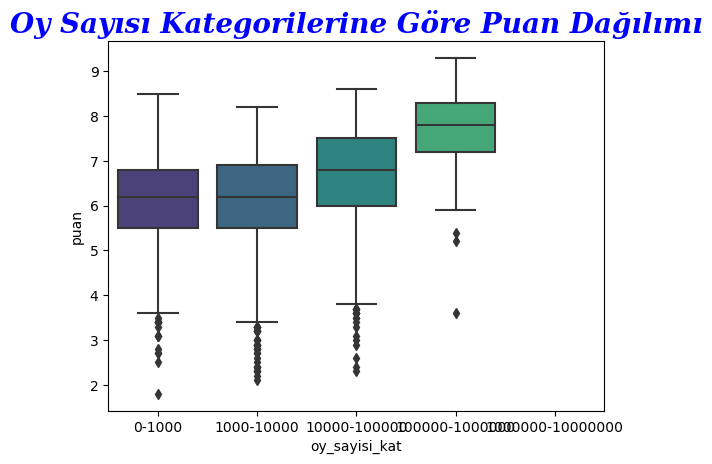

In [56]:
#Daha sonra lazım olacak.
#Puanlama ve oy sayılarını kategorik hale getirelim

puanlama_aralik = puanlama['oy_sayisi'].quantile(np.arange(0, 1, .01))

puanlama_aralik = puanlama_aralik.astype(int)

puanlama_aralik


puanlama['oy_sayisi_kat'] = pd.cut(puanlama['oy_sayisi'], bins=[0, 1000, 10000, 100000, 1000000, 10000000],
                                   labels=['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000'])
oy_box = sns.boxplot(x='oy_sayisi_kat', y='puan', data=puanlama, palette='viridis').set_title('Oy Sayısı Kategorilerine Göre Puan Dağılımı', fontsize=20, fontweight='bold', fontfamily='serif', color='blue', style='italic')

* Histogramların incelenmesi için fonksiyon oluşturma



In [57]:
def histogram_olustur(df, kolon, title):
    plt.figure(figsize =(10, 4))
    sns.set_style("whitegrid")
    sns.set_palette("Set2")
    df[kolon].hist(bins = 70)
    plt.title(title, fontsize=15)

In [58]:
film.head()

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au]
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us]
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us]
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us]
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",0,0,2014,2.0,Grindhouse Films [us]


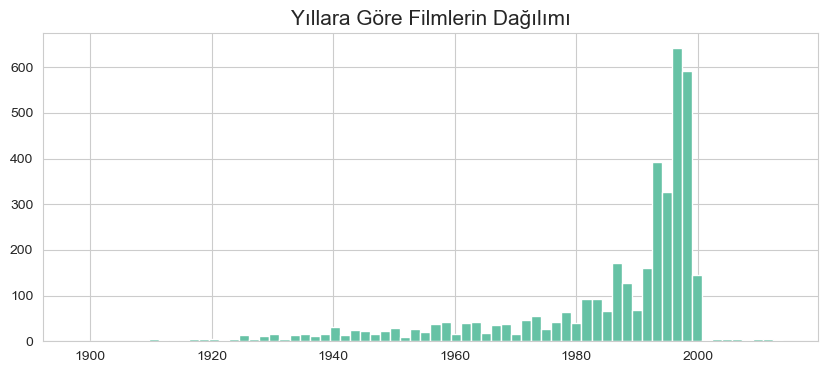

In [59]:
histogram_olustur(film, 'yil', 'Yıllara Göre Filmlerin Dağılımı')

<AxesSubplot:title={'center':'Puanlara Göre Filmlerin Dağılımı'}, ylabel='Frequency'>

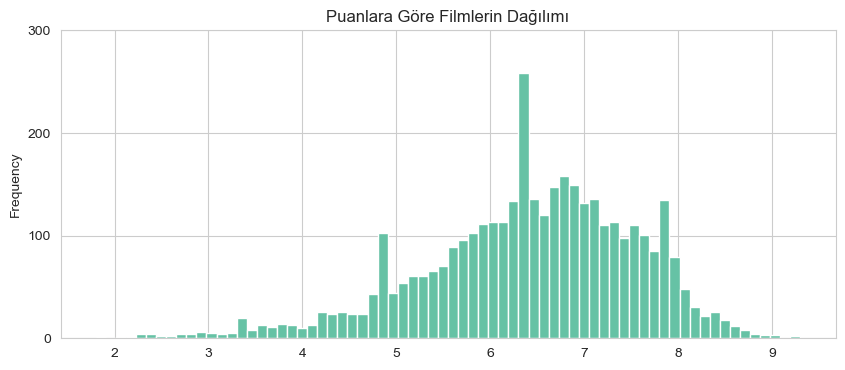

In [60]:
#0 grubu outlier olarak düşünülebilir. 0 olanları çıkartalım. Bu sıfırları daha önce doldurmuştum.
film = film[film['puan'] != str(0)]
film["puan"].astype("float").plot(kind = 'hist', bins = 70, figsize = (10,4), title='Puanlara Göre Filmlerin Dağılımı', yticks=range(0, 400, 100))

       -------------------------------------------------------------Ekstra-----------------------------------------------------------------------------

**12-) Film Arama Motoru** 

*******************************************************

In [61]:

#Sadece bu karakterleri kullanan isimler lazım.
def temizleme(baslik):
    return re.sub("[^a-zA-Z0-9 ]", " ", baslik)


In [62]:
film['temiz_baslik'] = film['baslik'].apply(temizleme)

In [63]:
#Başlıkları vektörler halinde tutalım.

 
vektor = TfidfVectorizer(ngram_range=(1, 2))
tfidf = vektor.fit_transform(film['temiz_baslik'])

In [64]:
film

,baslik,ulke,tur,oyuncu_kodu,dil,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au],Breaker Morant 1980
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us],Crocodile Dundee II 1988
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us],Til There Was You 1997
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us],night Mother 1986
1673647,1-2-3-4 ou Les collants noirs (1961),France,Drama,"[149985.0, 149985.0, 149985.0, 261595.0, 26159...","[French, French, French, French, French, Frenc...",6.5,128.0,1961,0.0,Doperfilme [pt],1 2 3 4 ou Les collants noirs 1961
...,...,...,...,...,...,...,...,...,...,...,...
2591814,eXistenZ (1999),Canada,Sci-Fi,"[351134.0, 351134.0, 351134.0, 351134.0, 35113...","[English, English, English, English, English, ...",6.8,56563.0,1999,4.0,Alliance Atlantis Communications [ca],eXistenZ 1999
2592334,¡Three Amigos! (1986),USA,Adventure,"[55074.0, 55074.0, 66882.0, 66882.0, 130568.0,...","[English, English, English, English, English, ...",6.2,36951.0,1986,4.0,Home Box Office (HBO) [us] - (in association w...,Three Amigos 1986
2592963,À nous la liberté (1931),France,Comedy,"[215084.0, 320651.0, 726702.0, 946667.0, 99138...","[French, French, French, French, French, Frenc...",7.6,2294.0,1931,9.0,Films Sonores Tobis [fr],nous la libert 1931


In [65]:
pd.set_option('display.max_rows', 5)


film_temizlenmis = film.drop(['oyuncu_kodu', 'dil'], axis = 1)
film.drop_duplicates(subset='baslik', inplace=True)

def arama(baslik):
    baslik = temizleme(baslik)
    sorgu_vektoru = vektor.transform([baslik])
    benzerlik = cosine_similarity(tfidf, sorgu_vektoru).flatten()
    #en_benzer = np.argsort(-benzerlik)[:10]
    #return film.iloc[en_benzer]
    indis = np.argpartition(benzerlik, -5)[-5:]
    sonuc = film_temizlenmis.iloc[indis][::-1]
    return sonuc

arama('Star Wars')

,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,
2371726,Star Wars (1977),USA,Action,8.8,547422.0,1977,0.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars 1977
2371778,Star Wars: Episode I - The Phantom Menace (1999),USA,Action,6.5,332748.0,1999,11.0,Lucasfilm [us],Star Wars Episode I The Phantom Menace 1999
2371786,Star Wars: Episode V - The Empire Strikes Back...,USA,Action,8.8,487093.0,1980,8.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars Episode V The Empire Strikes Back...
2371787,Star Wars: Episode VI - Return of the Jedi (1983),USA,Action,8.4,382574.0,1983,37.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars Episode VI Return of the Jedi 1983
2216295,North Star (1996),France,Action,4.6,695.0,1996,10.0,AFCL Productions,North Star 1996


In [66]:
arama('The Godfather')

,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,
2437300,The Godfather: Part III (1990),USA,Crime,7.6,167195.0,1990,42.0,Paramount Pictures [us],The Godfather Part III 1990
2437299,The Godfather: Part II (1974),USA,Crime,9.0,457100.0,1974,36.0,Paramount Pictures [us] - (as A Paramount Pict...,The Godfather Part II 1974
2437277,The Godfather (1972),USA,Crime,9.2,706695.0,1972,15.0,Alfran Productions [us] - (produced by) (as Al...,The Godfather 1972
2419930,The City of the Dead (1960),UK,Horror,6.8,2529.0,1960,13.0,Vulcan,The City of the Dead 1960
2479393,The Slipper and the Rose: The Story of Cindere...,UK,Adventure,6.5,1319.0,1976,39.0,Paradine Co-Productions - (presents) (as Parad...,The Slipper and the Rose The Story of Cindere...


In [67]:


def arama(baslik):
    baslik = temizleme(baslik)
    sorgu_vektoru = vektor.transform([baslik])
    benzerlik = cosine_similarity(tfidf, sorgu_vektoru).flatten()
    #en_benzer = np.argsort(-benzerlik)[:10]
    #return film.iloc[en_benzer]
    indis = np.argpartition(benzerlik, -5)[-5:]
    sonuc = film_temizlenmis.iloc[indis][::-1]
    return sonuc

arama('Star Wars')


,baslik,ulke,tur,puan,oy_sayisi,yil,basrol,sirket_adi,temiz_baslik
movieid,,,,,,,,,
2371726,Star Wars (1977),USA,Action,8.8,547422.0,1977,0.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars 1977
2371778,Star Wars: Episode I - The Phantom Menace (1999),USA,Action,6.5,332748.0,1999,11.0,Lucasfilm [us],Star Wars Episode I The Phantom Menace 1999
2371786,Star Wars: Episode V - The Empire Strikes Back...,USA,Action,8.8,487093.0,1980,8.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars Episode V The Empire Strikes Back...
2371787,Star Wars: Episode VI - Return of the Jedi (1983),USA,Action,8.4,382574.0,1983,37.0,Lucasfilm [us] - (as A Lucasfilm Limited Produ...,Star Wars Episode VI Return of the Jedi 1983
2216295,North Star (1996),France,Action,4.6,695.0,1996,10.0,AFCL Productions,North Star 1996


In [68]:

#film_girisi = widgets.interactive(arama, baslik = 'Star Wars')

widgets.Text(value='', placeholder='Bir film adı giriniz.', description='Film: ', disabled=False)

film_girisi = widgets.Output()

In [69]:
#film_girisi = widgets.interactive(arama, baslik = 'Star Wars')

film_girisi = widgets.Text(value=" ", aciklama="Film Adı", disabled=False, placeholder="Bir film adı giriniz.")
film_girisi


film_Listesi = widgets.Output()

def yazarken(veri):
    with film_Listesi:
        film_Listesi.clear_output()
        baslik = veri["new"]
        if len(baslik)>5:
            display(arama(baslik))
    
    
    
film_girisi.observe(yazarken, names="value")
display(film_girisi, film_Listesi)



Text(value=' ', placeholder='Bir film adı giriniz.')

Output()

*****************************************************

**13-) Oluşturulmuş metriklere göre analizler**

*******************************************************************


In [70]:
moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')
              
puanlama = pd.DataFrame(film.groupby('baslik')['puan'].mean())  
puanlama['oy_sayisi'] = pd.DataFrame(film.groupby('baslik')['oy_sayisi'].mean())
#türüne göre puanlama
puanlama['tur'] = pd.DataFrame(film.groupby('baslik')['tur'].first())
moviemat.head()
  
puanlama.sort_values('puan', ascending = False).head(10)

moviemat = film.pivot_table(index ='movieid', columns ='baslik', values ='puan')

puanlama.sort_values('oy_sayisi', ascending = False).head(10)
           

,puan,oy_sayisi,tur
baslik,,,
The Shawshank Redemption (1994),9.3,998823.0,Crime
Pulp Fiction (1994),9.0,775943.0,Crime
...,...,...,...
Star Wars (1977),8.8,547422.0,Action
American Beauty (1999),8.5,520963.0,Drama


In [71]:
moviemat = moviemat.fillna(int(0))


In [72]:
puanlama.drop_duplicates(inplace=True)
puanlama.head()

,puan,oy_sayisi,tur
baslik,,,
'Breaker' Morant (1980),7.8,8111.0,Drama
'Crocodile' Dundee II (1988),5.3,32183.0,Action
'Til There Was You (1997),4.4,1894.0,Comedy
"'night, Mother (1986)",7.0,1255.0,Drama
1-2-3-4 ou Les collants noirs (1961),6.5,128.0,Drama


In [73]:
puanlama.dtypes


puan         float64
oy_sayisi    float64
tur           object
dtype: object

In [74]:
#Oy sayısını normalleştirelim.
puanlama['oy_sayisi'] = puanlama['oy_sayisi'].apply(lambda x: (x - puanlama['oy_sayisi'].min()) / (puanlama['oy_sayisi'].max() - puanlama['oy_sayisi'].min()))
puanlama


,puan,oy_sayisi,tur
baslik,,,
'Breaker' Morant (1980),7.8,0.008121,Drama
'Crocodile' Dundee II (1988),5.3,0.032221,Action
...,...,...,...
Á köldum klaka (1995),6.9,0.001232,Comedy
Átame! (1990),6.9,0.012101,Comedy


*************************************************************

In [75]:
#En başta film bütünü tanımlamıştık. Şimdi bu film bütününü kullanarak bir dataframe oluşturalım ve distribution'ı da dahil edelim.

df_film = film_butunu.groupby('movieid').agg({'title': 'first', 'country': 'first', 'genre': 'first', 'actorid': list, 'language': list,
 'rank': 'first', 'votes' : 'mean', 'year': 'first', 'leading': 'first', 'name': 'first', 'distribution': 'first'})
df_film;

In [76]:
#Kendimizce bir metrik oluşturalım. Bu metriğin amacı oy sayısının çok olmasına rağmen puanın düşük olması durumunda filmi düşük puanlamaktır.
def weighted_rating(x, m=10, C=7.0):
    v = x['votes']
    R = x['rank']
    return (v/(v+m) * R) + (m/(m+v) * C)

df_film['skor'] = df_film.apply(weighted_rating, axis=1)

<AxesSubplot:ylabel='title'>

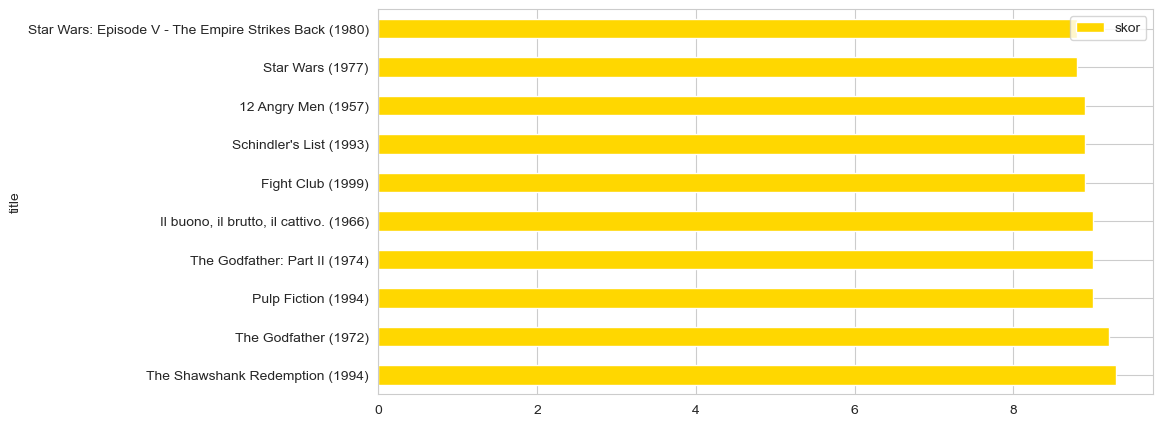

In [77]:
#Bu metriği kullanarak en iyi filmleri sıralayalım.
df_film = df_film.sort_values('skor', ascending=False)
df_film[['title',  'skor']].head(10)

#İlk 10 filmi yazdıralım.
df_film[['title',  'skor']].head(10).plot(x='title', y='skor', kind='barh', figsize=(10, 5), color='gold')


**BONUS: WordCloud**

Başlıklarda en çok kullanılan kelimeler. Love, Man, Day, Le, La, Night, II, Story...

In [78]:

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


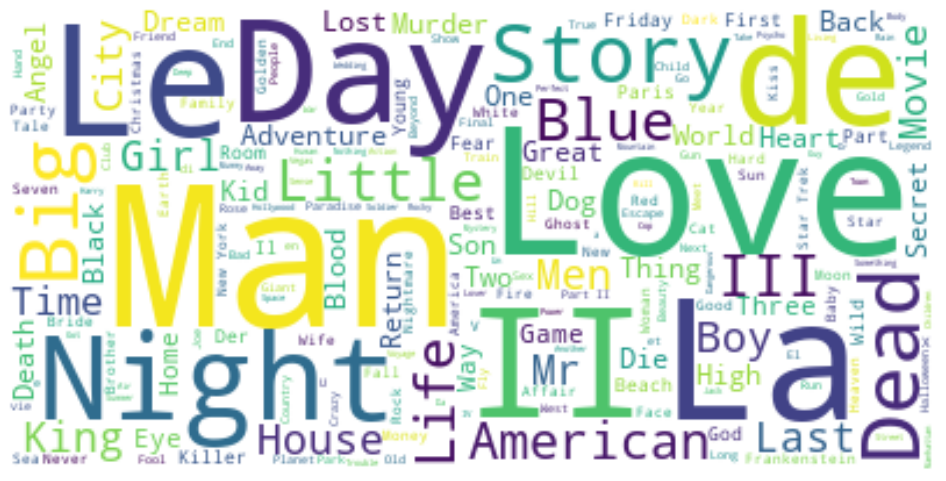

In [82]:
text = " ".join(i for i in film.baslik)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10), dpi= 80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

En çok film üreten ilk 10 şirket:


<AxesSubplot:>

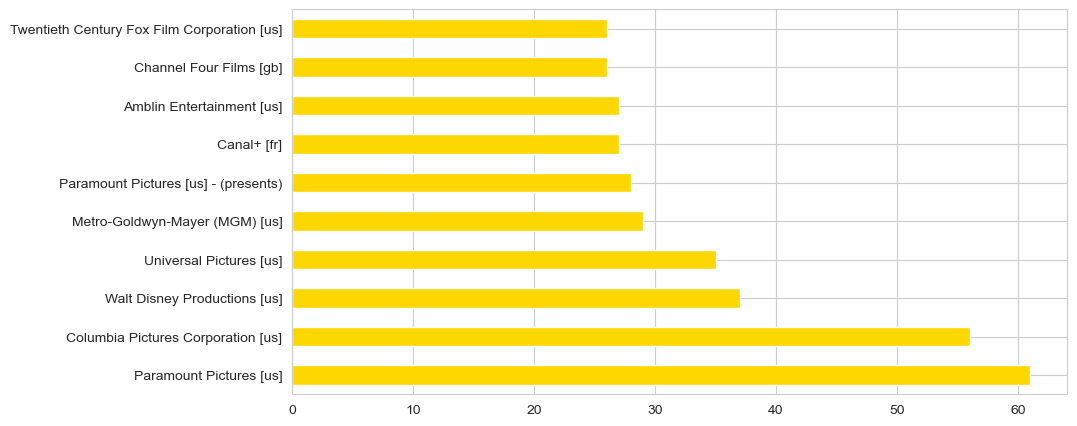

In [89]:
film2 = film.copy()

film2['sirket_adi'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='gold')


<AxesSubplot:>

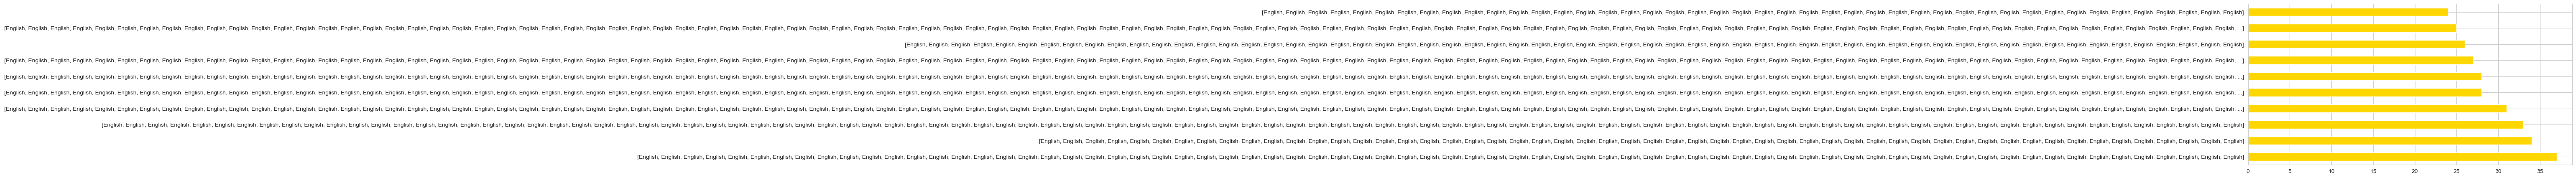

In [94]:
film2['dil'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='gold')
#düzelt